In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels xgboost tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy<2


Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import pearsonr, spearmanr


In [102]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\koush\Downloads\merged_dataset_clean.csv")
print(df.info())

C:\Users\koush\AppData\Local\Temp\ipykernel_14808\3220813950.py:3: DtypeWarning: Columns (57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\koush\Downloads\merged_dataset_clean.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272017 entries, 0 to 272016
Data columns (total 58 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   State Code                     272017 non-null  int64  
 1   County Code                    272017 non-null  int64  
 2   Site Num                       272017 non-null  int64  
 3   Parameter Code                 272017 non-null  int64  
 4   POC                            272017 non-null  int64  
 5   Latitude                       272017 non-null  float64
 6   Longitude                      272017 non-null  float64
 7   Datum                          272017 non-null  object 
 8   Parameter Name                 272017 non-null  object 
 9   Sample Duration                272017 non-null  object 
 10  Pollutant Standard             82316 non-null   object 
 11  Metric Used                    272017 non-null  object 
 12  Method Name                   

In [117]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272017 entries, 0 to 272016
Data columns (total 58 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   State Code                     272017 non-null  int64  
 1   County Code                    272017 non-null  int64  
 2   Site Num                       272017 non-null  int64  
 3   Parameter Code                 272017 non-null  int64  
 4   POC                            272017 non-null  int64  
 5   Latitude                       272017 non-null  float64
 6   Longitude                      272017 non-null  float64
 7   Datum                          272017 non-null  object 
 8   Parameter Name                 272017 non-null  object 
 9   Sample Duration                272017 non-null  object 
 10  Pollutant Standard             82316 non-null   object 
 11  Metric Used                    272017 non-null  object 
 12  Method Name                   

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,Local Site Name,Address,State,County,City Name,CBSA Name,Date of Last Change,Asthma_Rate,Pollution_Index,COPD_Rate
count,272017.000000,272017.000000,272017.000000,272017.000000,272017.000000,272017.000000,272017.000000,272017,272017,272017,...,258262,272017,272017,272017,222192,249668,272017,272017.00000,272017.000000,272017.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,544,12,...,1557,1716,28,489,812,316,644,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WGS84,PM2.5 - Local Conditions,24 HOUR,...,JLG SUPERSITE,4530 N 17TH AVENUE,California,Los Angeles,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-05-21,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214784,48495,171175,...,3193,3193,63123,7350,7263,14014,120331,NaN,NaN,NaN
mean,23.639971,57.209980,1378.369091,65998.294250,3.419058,38.573007,-95.496230,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.83259,9.060032,57.332657
std,15.960794,62.260382,2599.667336,22034.918864,6.745084,4.349536,18.426311,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.32566,3.238558,35.912067
min,4.000000,1.000000,1.000000,11101.000000,1.000000,25.391220,-124.263889,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.000000,0.000000
25%,6.000000,15.000000,7.000000,43837.000000,1.000000,35.331612,-115.483070,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.40000,7.100000,33.500000
50%,23.000000,39.000000,30.000000,68105.000000,2.000000,39.464872,-91.315418,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.10000,8.500000,50.100000
75%,36.000000,79.000000,1028.000000,88101.000000,5.000000,41.807469,-77.548170,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.00000,10.200000,72.400000


In [103]:
missing_values = df[['Asthma_Rate', 'COPD_Rate', 'Pollution_Index', 'EPA_PM25_Mean']].isnull().sum()
print("Missing values before conversion:\n", missing_values)

Missing values before conversion:
 Asthma_Rate         0
COPD_Rate           0
Pollution_Index     0
EPA_PM25_Mean      91
dtype: int64


In [104]:
df['Asthma_Rate'] = pd.to_numeric(df['Asthma_Rate'], errors='coerce')
df['COPD_Rate'] = pd.to_numeric(df['COPD_Rate'], errors='coerce')

In [105]:
# Re-check missing values after conversion
missing_values_after_conversion = df[['Asthma_Rate', 'COPD_Rate']].isnull().sum()
print("Missing values after conversion:\n", missing_values_after_conversion)

Missing values after conversion:
 Asthma_Rate    1839
COPD_Rate      1442
dtype: int64


In [106]:
df.loc[:, 'Asthma_Rate'] = df['Asthma_Rate'].fillna(df['Asthma_Rate'].median())
df.loc[:, 'COPD_Rate'] = df['COPD_Rate'].fillna(df['COPD_Rate'].median())
df.loc[:, 'EPA_PM25_Mean'] = df['EPA_PM25_Mean'].fillna(df['EPA_PM25_Mean'].median())


In [107]:
print("Missing values after imputation:\n", df[['Asthma_Rate', 'COPD_Rate', 'EPA_PM25_Mean']].isnull().sum())


Missing values after imputation:
 Asthma_Rate      0
COPD_Rate        0
EPA_PM25_Mean    0
dtype: int64


In [119]:
selected_features = ['State', 'County', 'Year', 'Pollution_Index', 'EPA_PM25_Mean', 'Asthma_Rate', 'COPD_Rate']
df_selected = df[selected_features]

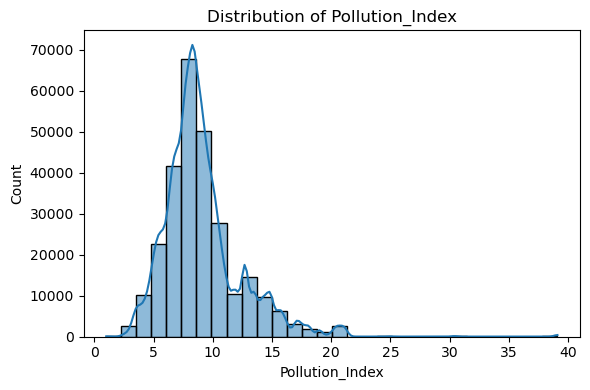

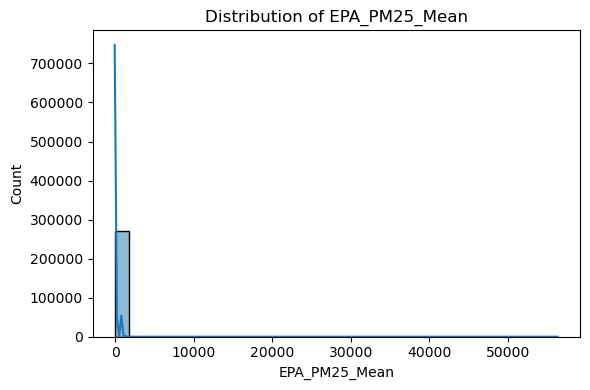

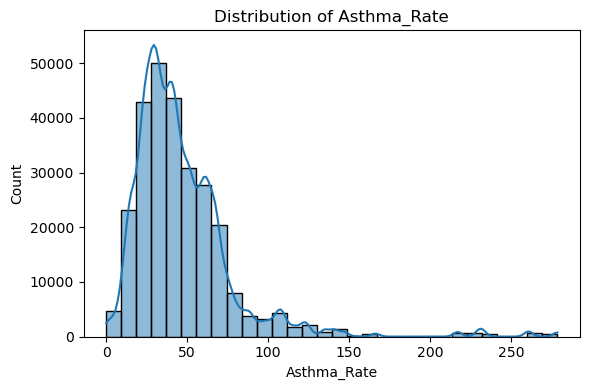

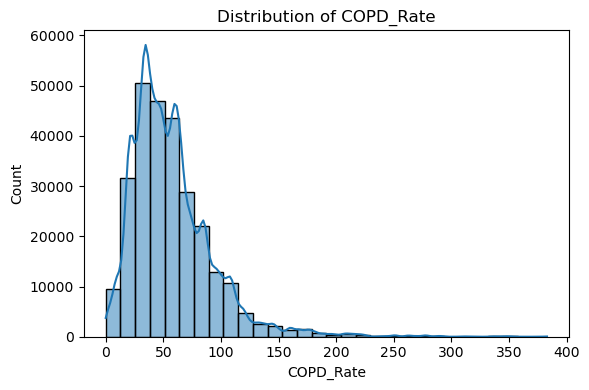

In [127]:
#Graphical analysis
#distribution plots
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_plot = ['Pollution_Index', 'EPA_PM25_Mean', 'Asthma_Rate', 'COPD_Rate']

for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(df_selected[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


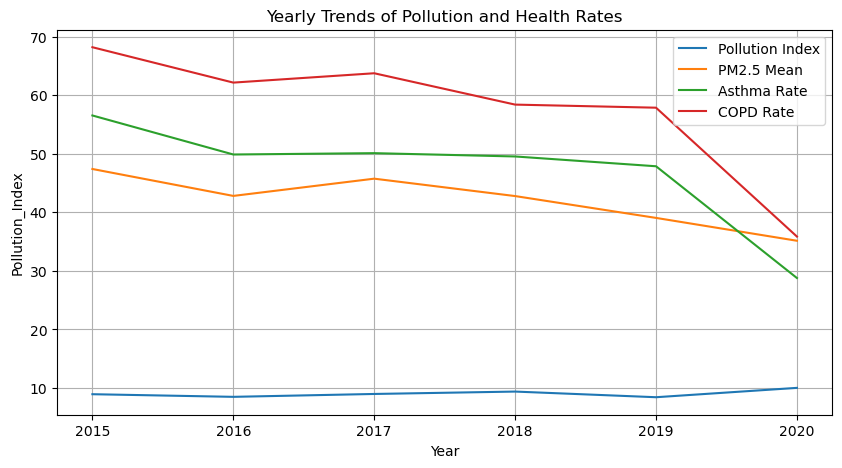

In [128]:
# Time Trend (Pollution & Health over Years)
yearly_avg = df_selected.groupby('Year')[['Pollution_Index', 'EPA_PM25_Mean', 'Asthma_Rate', 'COPD_Rate']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_avg, x='Year', y='Pollution_Index', label='Pollution Index')
sns.lineplot(data=yearly_avg, x='Year', y='EPA_PM25_Mean', label='PM2.5 Mean')
sns.lineplot(data=yearly_avg, x='Year', y='Asthma_Rate', label='Asthma Rate')
sns.lineplot(data=yearly_avg, x='Year', y='COPD_Rate', label='COPD Rate')
plt.title("Yearly Trends of Pollution and Health Rates")
plt.legend()
plt.grid(True)
plt.show()


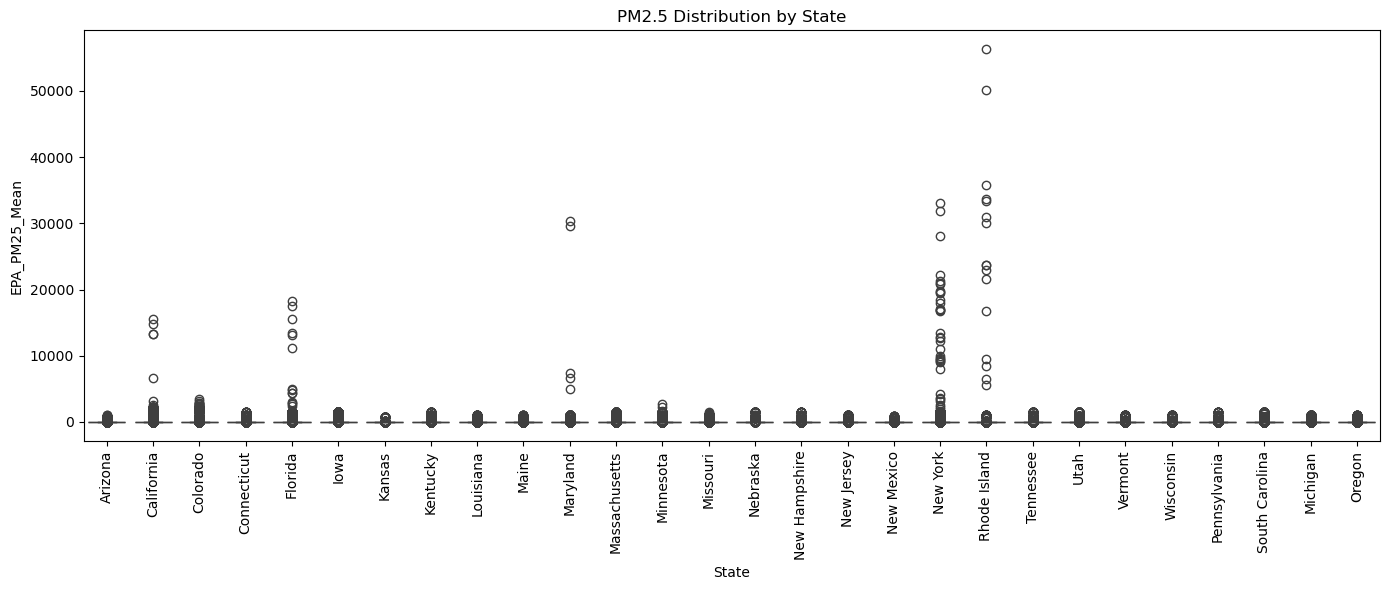

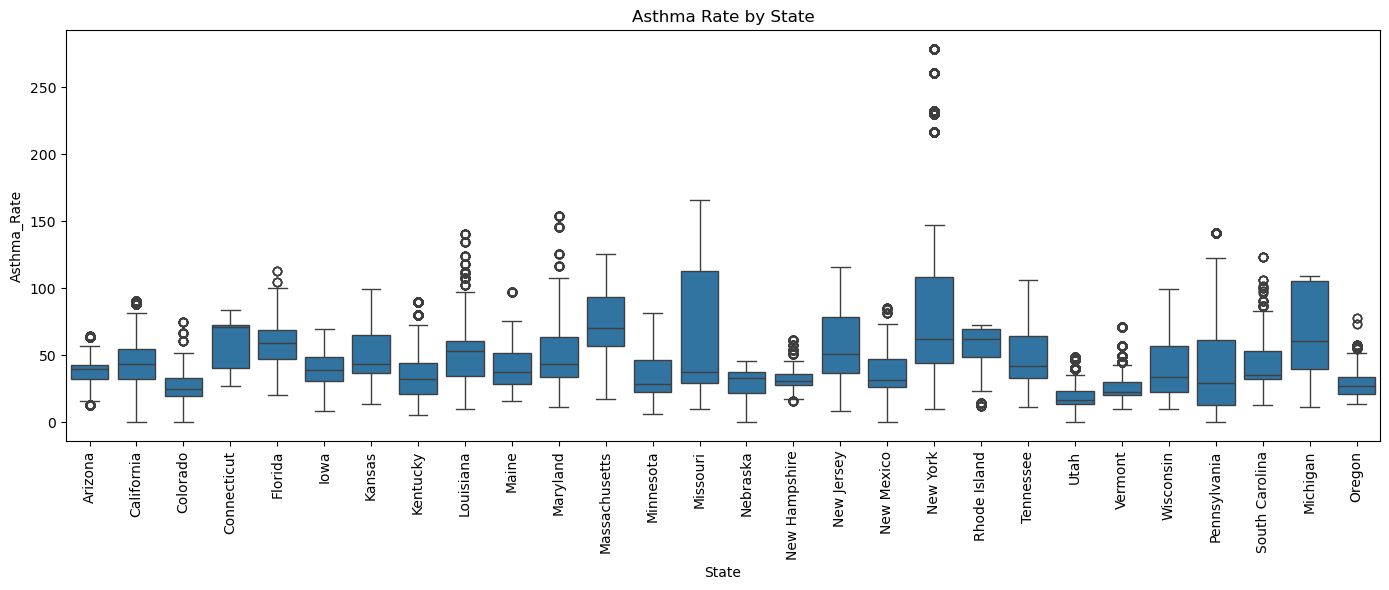

In [133]:
#box plots
plt.figure(figsize=(14,6))
sns.boxplot(data=df_selected, x='State', y='EPA_PM25_Mean')
plt.title("PM2.5 Distribution by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(data=df_selected, x='State', y='Asthma_Rate')
plt.title("Asthma Rate by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [131]:
# You can filter the outliers for further inspection
outlier_pm25 = df_selected[df_selected['EPA_PM25_Mean'] > df_selected['EPA_PM25_Mean'].quantile(0.99)]
outlier_asthma = df_selected[df_selected['Asthma_Rate'] > df_selected['Asthma_Rate'].quantile(0.99)]


In [132]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply to relevant columns
df_cleaned = df_selected.copy()
df_cleaned = remove_outliers_iqr(df_cleaned, 'EPA_PM25_Mean')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Asthma_Rate')


C:\Users\koush\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


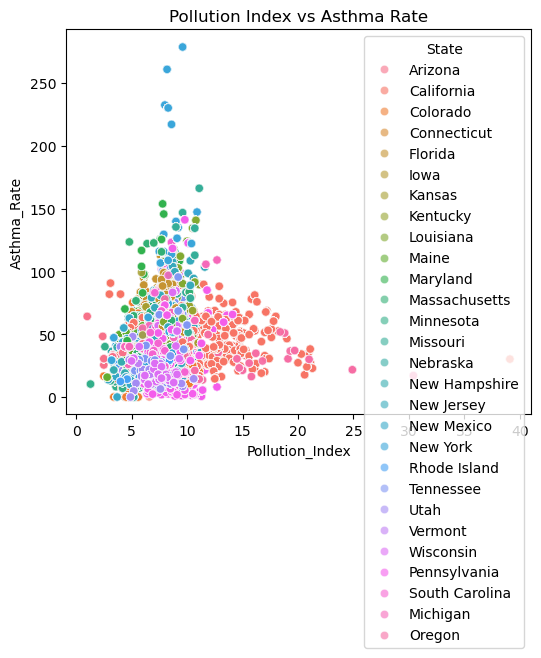

C:\Users\koush\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


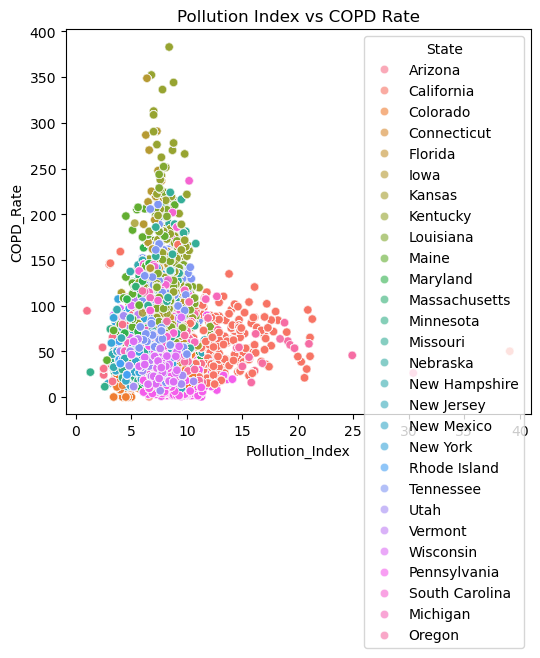

C:\Users\koush\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


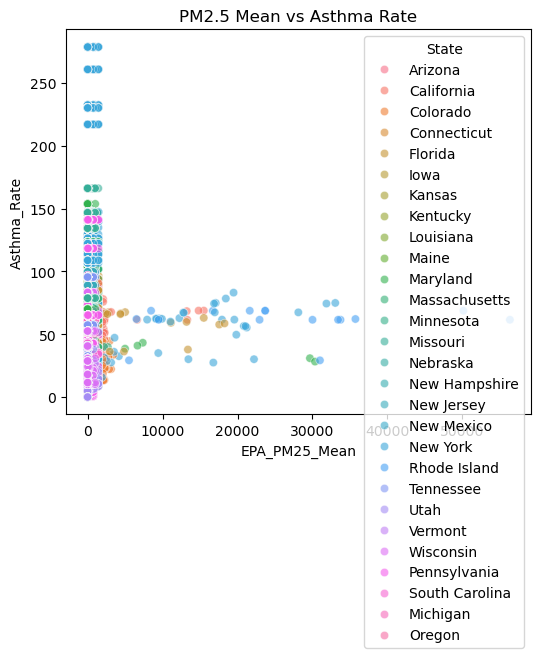

C:\Users\koush\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


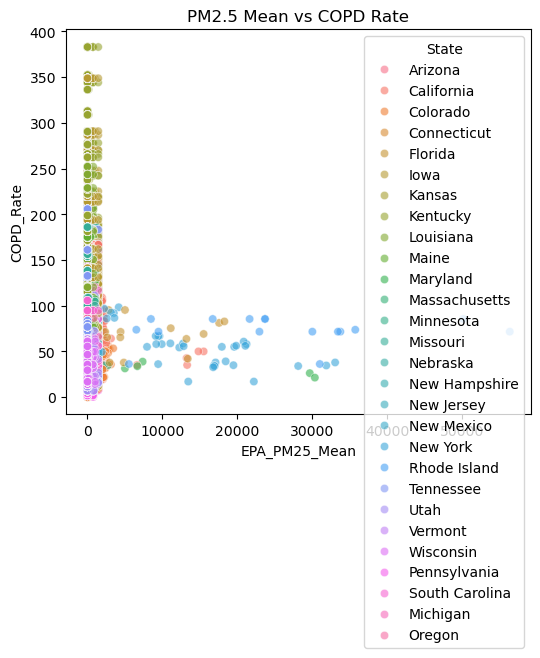

In [130]:
#scatter plots
# Pollution Index vs Health
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_selected, x='Pollution_Index', y='Asthma_Rate', hue='State', alpha=0.6)
plt.title("Pollution Index vs Asthma Rate")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(data=df_selected, x='Pollution_Index', y='COPD_Rate', hue='State', alpha=0.6)
plt.title("Pollution Index vs COPD Rate")
plt.show()

# PM2.5 vs Health
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_selected, x='EPA_PM25_Mean', y='Asthma_Rate', hue='State', alpha=0.6)
plt.title("PM2.5 Mean vs Asthma Rate")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(data=df_selected, x='EPA_PM25_Mean', y='COPD_Rate', hue='State', alpha=0.6)
plt.title("PM2.5 Mean vs COPD Rate")
plt.show()


C:\Users\koush\AppData\Local\Temp\ipykernel_14808\3915733966.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Asthma_Rate'] = pd.to_numeric(df_selected['Asthma_Rate'], errors='coerce')
C:\Users\koush\AppData\Local\Temp\ipykernel_14808\3915733966.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['COPD_Rate'] = pd.to_numeric(df_selected['COPD_Rate'], errors='coerce')


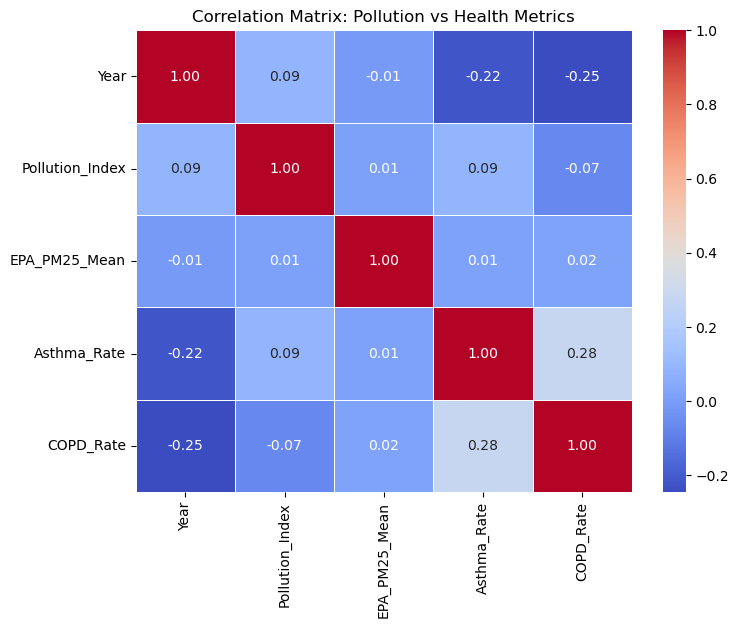

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert health columns to numeric (in case they are strings)
df_selected['Asthma_Rate'] = pd.to_numeric(df_selected['Asthma_Rate'], errors='coerce')
df_selected['COPD_Rate'] = pd.to_numeric(df_selected['COPD_Rate'], errors='coerce')

# Drop non-numeric columns for correlation matrix
df_numeric = df_selected.drop(columns=['State', 'County'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Pollution vs Health Metrics")
plt.show()


In [138]:
#Feature engineering
def categorize_aqi(value):
    if value <= 50:
        return 'Good'
    elif value <= 100:
        return 'Moderate'
    elif value <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif value <= 200:
        return 'Unhealthy'
    elif value <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'
df_selected['AQI_Category'] = df_selected['Pollution_Index'].apply(categorize_aqi)
print(df_selected.head())

     State  County  Year  Pollution_Index  EPA_PM25_Mean  Asthma_Rate  \
0  Arizona  Apache  2015              5.7      12.591454         32.5   
1  Arizona  Apache  2015              5.7      12.591454         32.5   
2  Arizona  Apache  2015              5.7      12.103352         32.5   
3  Arizona  Apache  2015              5.7       2.656250         32.5   
4  Arizona  Apache  2015              5.7       2.656250         32.5   

   COPD_Rate AQI_Category  Log_PM25  Log_Pollution_Index  Log_Asthma_Rate  \
0       31.6         Good  2.609441             1.902108         3.511545   
1       31.6         Good  2.609441             1.902108         3.511545   
2       31.6         Good  2.572868             1.902108         3.511545   
3       31.6         Good  1.296438             1.902108         3.511545   
4       31.6         Good  1.296438             1.902108         3.511545   

   Log_COPD_Rate  
0       3.484312  
1       3.484312  
2       3.484312  
3       3.484312  
4  

C:\Users\koush\AppData\Local\Temp\ipykernel_14808\3612103021.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['AQI_Category'] = df_selected['Pollution_Index'].apply(categorize_aqi)


In [139]:
#compute moving averages for pollution levels
df_selected['PM25_7DAY_AVG'] = df_selected['EPA_PM25_Mean'].rolling(window=7, min_periods=1).mean()
df_selected['PM25_30DAY_AVG'] = df_selected['EPA_PM25_Mean'].rolling(window=30, min_periods=1).mean()
print(df_selected.head())

     State  County  Year  Pollution_Index  EPA_PM25_Mean  Asthma_Rate  \
0  Arizona  Apache  2015              5.7      12.591454         32.5   
1  Arizona  Apache  2015              5.7      12.591454         32.5   
2  Arizona  Apache  2015              5.7      12.103352         32.5   
3  Arizona  Apache  2015              5.7       2.656250         32.5   
4  Arizona  Apache  2015              5.7       2.656250         32.5   

   COPD_Rate AQI_Category  Log_PM25  Log_Pollution_Index  Log_Asthma_Rate  \
0       31.6         Good  2.609441             1.902108         3.511545   
1       31.6         Good  2.609441             1.902108         3.511545   
2       31.6         Good  2.572868             1.902108         3.511545   
3       31.6         Good  1.296438             1.902108         3.511545   
4       31.6         Good  1.296438             1.902108         3.511545   

   Log_COPD_Rate  PM25_7DAY_AVG  PM25_30DAY_AVG  
0       3.484312      12.591454       12.591454 

C:\Users\koush\AppData\Local\Temp\ipykernel_14808\1197653469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['PM25_7DAY_AVG'] = df_selected['EPA_PM25_Mean'].rolling(window=7, min_periods=1).mean()
C:\Users\koush\AppData\Local\Temp\ipykernel_14808\1197653469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['PM25_30DAY_AVG'] = df_selected['EPA_PM25_Mean'].rolling(window=30, min_periods=1).mean()


In [140]:
#introduce interation Terms
df_selected['PM25_PollutionIndex']=df_selected['EPA_PM25_Mean']*df_selected['Pollution_Index']
df_selected['PM25_AsthmaRate']=df_selected['EPA_PM25_Mean']*df_selected['Asthma_Rate']
df_selected['PollutionIndex_COPDRate']=df_selected['Pollution_Index']*df_selected['COPD_Rate']
print(df_selected.head())

     State  County  Year  Pollution_Index  EPA_PM25_Mean  Asthma_Rate  \
0  Arizona  Apache  2015              5.7      12.591454         32.5   
1  Arizona  Apache  2015              5.7      12.591454         32.5   
2  Arizona  Apache  2015              5.7      12.103352         32.5   
3  Arizona  Apache  2015              5.7       2.656250         32.5   
4  Arizona  Apache  2015              5.7       2.656250         32.5   

   COPD_Rate AQI_Category  Log_PM25  Log_Pollution_Index  Log_Asthma_Rate  \
0       31.6         Good  2.609441             1.902108         3.511545   
1       31.6         Good  2.609441             1.902108         3.511545   
2       31.6         Good  2.572868             1.902108         3.511545   
3       31.6         Good  1.296438             1.902108         3.511545   
4       31.6         Good  1.296438             1.902108         3.511545   

   Log_COPD_Rate  PM25_7DAY_AVG  PM25_30DAY_AVG  PM25_PollutionIndex  \
0       3.484312      12.5

C:\Users\koush\AppData\Local\Temp\ipykernel_14808\1903457610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['PM25_PollutionIndex']=df_selected['EPA_PM25_Mean']*df_selected['Pollution_Index']
C:\Users\koush\AppData\Local\Temp\ipykernel_14808\1903457610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['PM25_AsthmaRate']=df_selected['EPA_PM25_Mean']*df_selected['Asthma_Rate']
C:\Users\koush\AppData\Local\Temp\ipykernel_14808\1903457610.py:4: SettingWithCopyWarning: 
A value is t

In [13]:
pip install --upgrade numpy


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl (12.6 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [141]:
#Normalize Data Using MIN-MAx Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ['Pollution_Index', 'EPA_PM25_Mean', 'Asthma_Rate', 'COPD_Rate', 'PM25_7DAY_AVG', 'PM25_30DAY_AVG', 'PM25_PollutionIndex', 'PM25_AsthmaRate', 'PollutionIndex_COPDRate']
df_selected[numeric_cols] = scaler.fit_transform(df_selected[numeric_cols])
print(df_selected.head())

     State  County  Year  Pollution_Index  EPA_PM25_Mean  Asthma_Rate  \
0  Arizona  Apache  2015          0.12336       0.001252     0.116613   
1  Arizona  Apache  2015          0.12336       0.001252     0.116613   
2  Arizona  Apache  2015          0.12336       0.001243     0.116613   
3  Arizona  Apache  2015          0.12336       0.001076     0.116613   
4  Arizona  Apache  2015          0.12336       0.001076     0.116613   

   COPD_Rate AQI_Category  Log_PM25  Log_Pollution_Index  Log_Asthma_Rate  \
0   0.082507         Good  2.609441             1.902108         3.511545   
1   0.082507         Good  2.609441             1.902108         3.511545   
2   0.082507         Good  2.572868             1.902108         3.511545   
3   0.082507         Good  1.296438             1.902108         3.511545   
4   0.082507         Good  1.296438             1.902108         3.511545   

   Log_COPD_Rate  PM25_7DAY_AVG  PM25_30DAY_AVG  PM25_PollutionIndex  \
0       3.484312       0.0

C:\Users\koush\AppData\Local\Temp\ipykernel_14808\1851012097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[numeric_cols] = scaler.fit_transform(df_selected[numeric_cols])


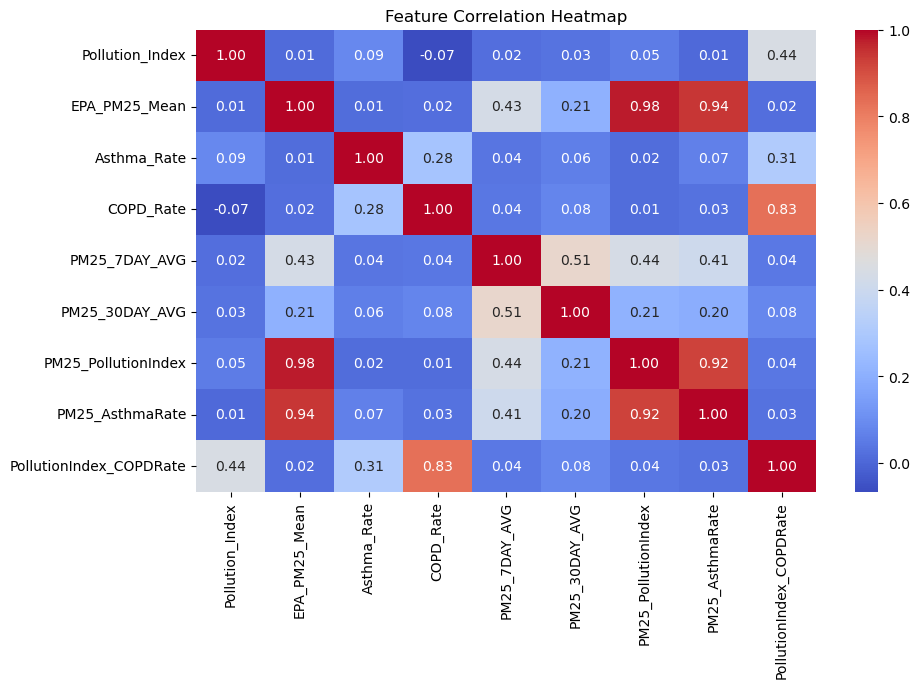

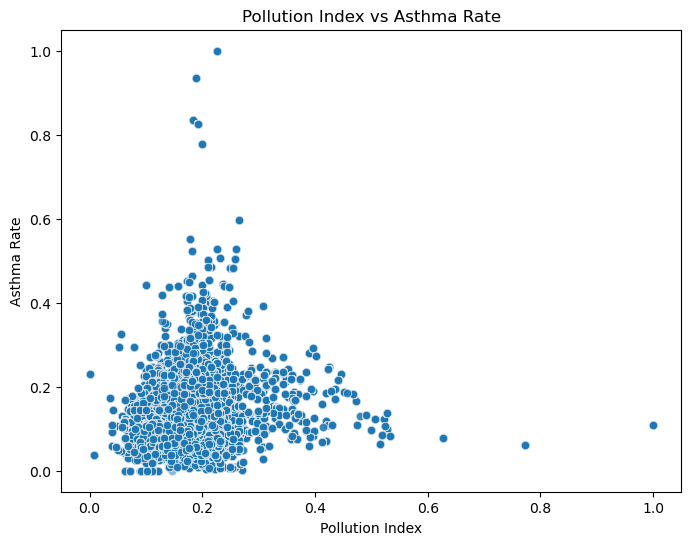

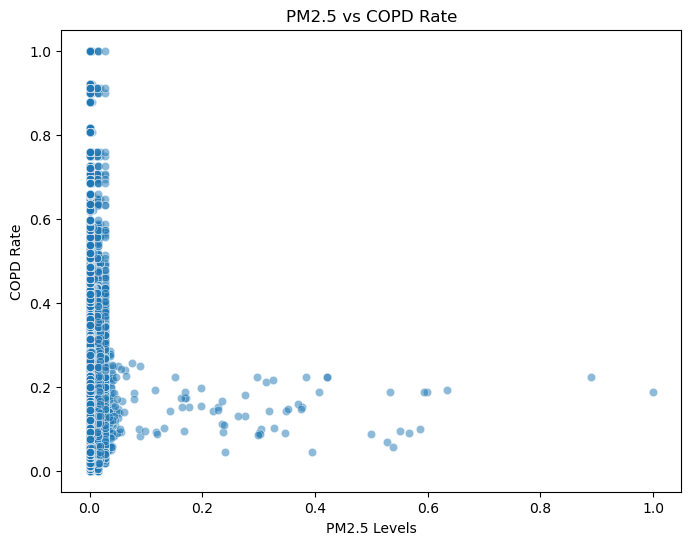

C:\Users\koush\AppData\Local\Temp\ipykernel_14808\2032672247.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_selected['AQI_Category'], palette='coolwarm', order=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])


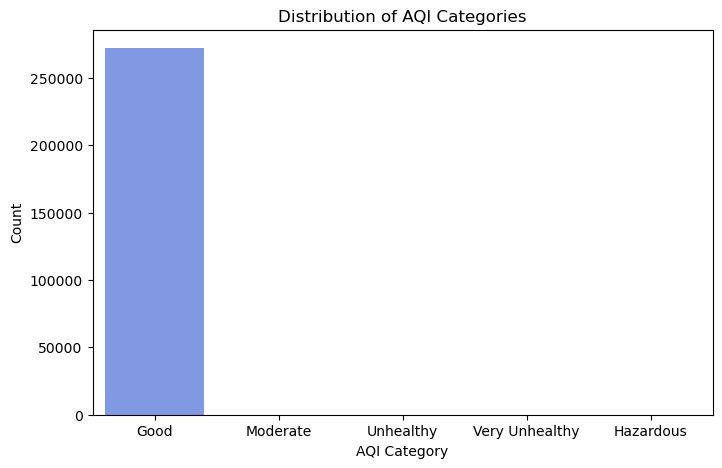

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_selected['Pollution_Index'], y=df_selected['Asthma_Rate'], alpha=0.5)
plt.xlabel("Pollution Index")
plt.ylabel("Asthma Rate")
plt.title("Pollution Index vs Asthma Rate")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_selected['EPA_PM25_Mean'], y=df_selected['COPD_Rate'], alpha=0.5)
plt.xlabel("PM2.5 Levels")
plt.ylabel("COPD Rate")
plt.title("PM2.5 vs COPD Rate")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=df_selected['AQI_Category'], palette='coolwarm', order=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])
plt.title("Distribution of AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.show()

In [16]:
pip install prophet


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [17]:
# Convert 'Year' to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')


In [18]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272017 entries, 0 to 272016
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   State                    272017 non-null  object 
 1   County                   272017 non-null  object 
 2   Year                     272017 non-null  int64  
 3   Pollution_Index          272017 non-null  float64
 4   EPA_PM25_Mean            272017 non-null  float64
 5   Asthma_Rate              272017 non-null  float64
 6   COPD_Rate                272017 non-null  float64
 7   AQI_Category             272017 non-null  object 
 8   PM25_7DAY_AVG            272017 non-null  float64
 9   PM25_30DAY_AVG           272017 non-null  float64
 10  PM25_PollutionIndex      272017 non-null  float64
 11  PM25_AsthmaRate          272017 non-null  float64
 12  PollutionIndex_COPDRate  272017 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 27.0+ MB


In [19]:

# Select relevant features for forecasting
df_time_series = df[['Year', 'Asthma_Rate', 'Pollution_Index', 'EPA_PM25_Mean']]



In [20]:

# Normalize pollution-related data (not for target variable)
scaler = MinMaxScaler()
df_time_series[['Pollution_Index', 'EPA_PM25_Mean']] = scaler.fit_transform(df_time_series[['Pollution_Index', 'EPA_PM25_Mean']])

C:\Users\koush\AppData\Local\Temp\ipykernel_14808\4270028768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_series[['Pollution_Index', 'EPA_PM25_Mean']] = scaler.fit_transform(df_time_series[['Pollution_Index', 'EPA_PM25_Mean']])


In [21]:
scaler = MinMaxScaler()

df_time_series.loc[:, ['Pollution_Index', 'EPA_PM25_Mean']] = scaler.fit_transform(df_time_series[['Pollution_Index', 'EPA_PM25_Mean']])


In [22]:
# Prepare data for Prophet (Prophet requires 'ds' as datetime and 'y' as target variable)
df_prophet = df_time_series.rename(columns={'Year': 'ds', 'Asthma_Rate': 'y'})

In [23]:
# Initialize Prophet model
from prophet import Prophet

model = Prophet()

# Add pollution-related external regressors
model.add_regressor('Pollution_Index')
model.add_regressor('EPA_PM25_Mean')

In [24]:
# Fit the model

model.fit(df_prophet)

14:14:15 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
print(df_prophet.isnull().sum())


ds                 0
y                  0
Pollution_Index    0
EPA_PM25_Mean      0
dtype: int64


In [26]:
df_prophet['EPA_PM25_Mean'].fillna(df_prophet['EPA_PM25_Mean'].median(), inplace=True)



C:\Users\koush\AppData\Local\Temp\ipykernel_14808\4121986863.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prophet['EPA_PM25_Mean'].fillna(df_prophet['EPA_PM25_Mean'].median(), inplace=True)


In [27]:
df_prophet['y'].fillna(df_prophet['y'].median(), inplace=True)


C:\Users\koush\AppData\Local\Temp\ipykernel_14808\4192127863.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prophet['y'].fillna(df_prophet['y'].median(), inplace=True)


In [28]:
# Create future dataframe for forecasting
future = model.make_future_dataframe(periods=10, freq='YE')  # Forecast for next 10 years

# Include external regressors in future predictions
future['Pollution_Index'] = df_time_series['Pollution_Index'].mean()
future['EPA_PM25_Mean'] = df_time_series['EPA_PM25_Mean'].mean()

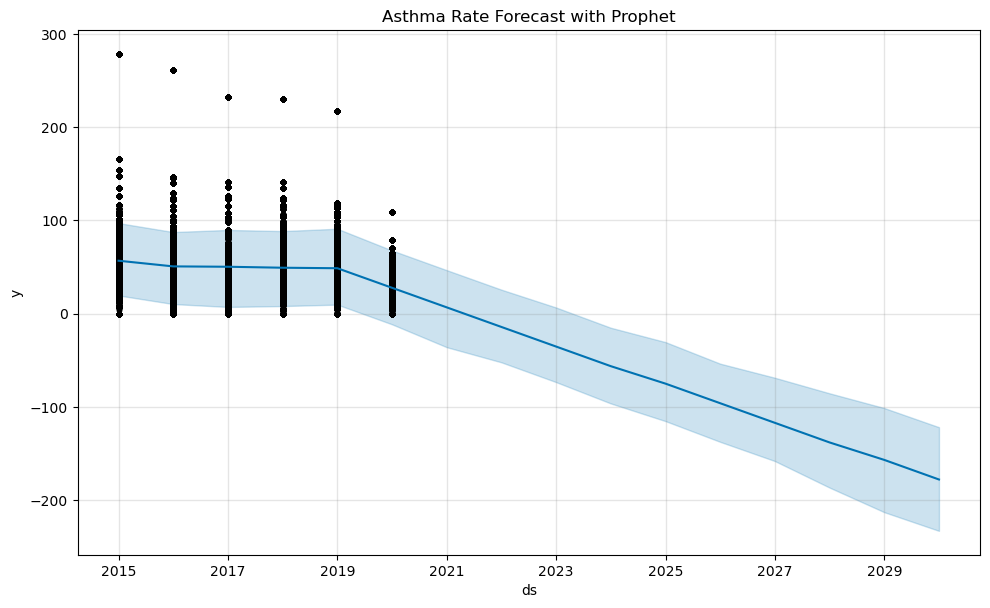

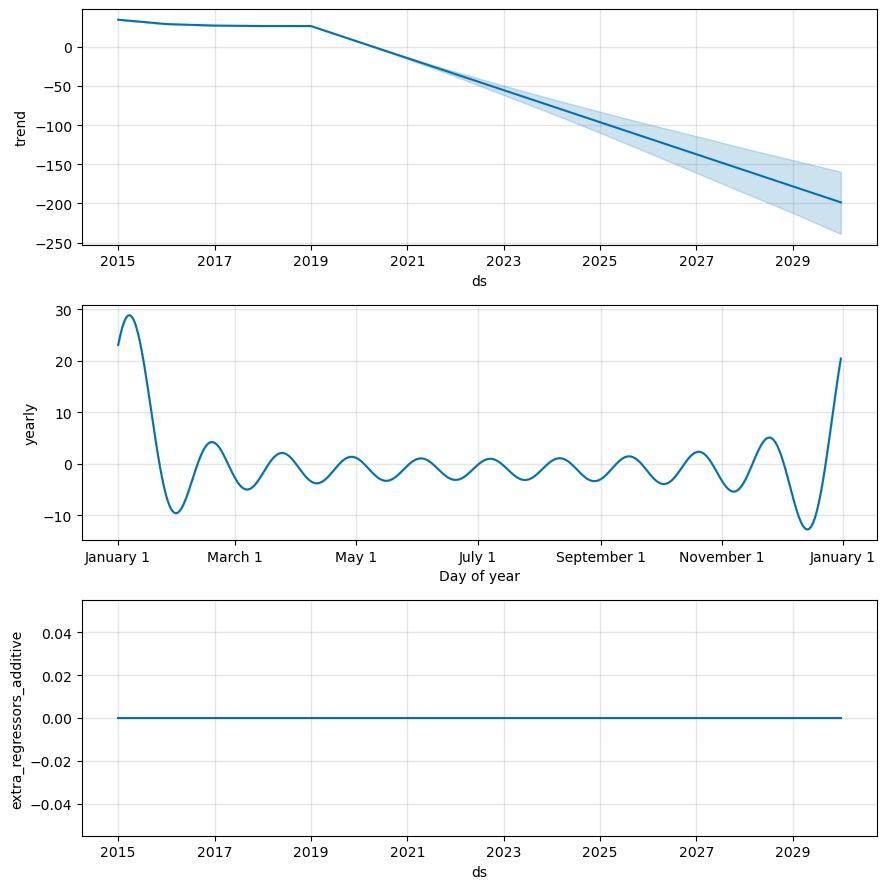

In [29]:
# Make predictions
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Asthma Rate Forecast with Prophet")
plt.show()

# Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()

14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:15:18 - cmdstanpy - INFO - Chain [1] done processing


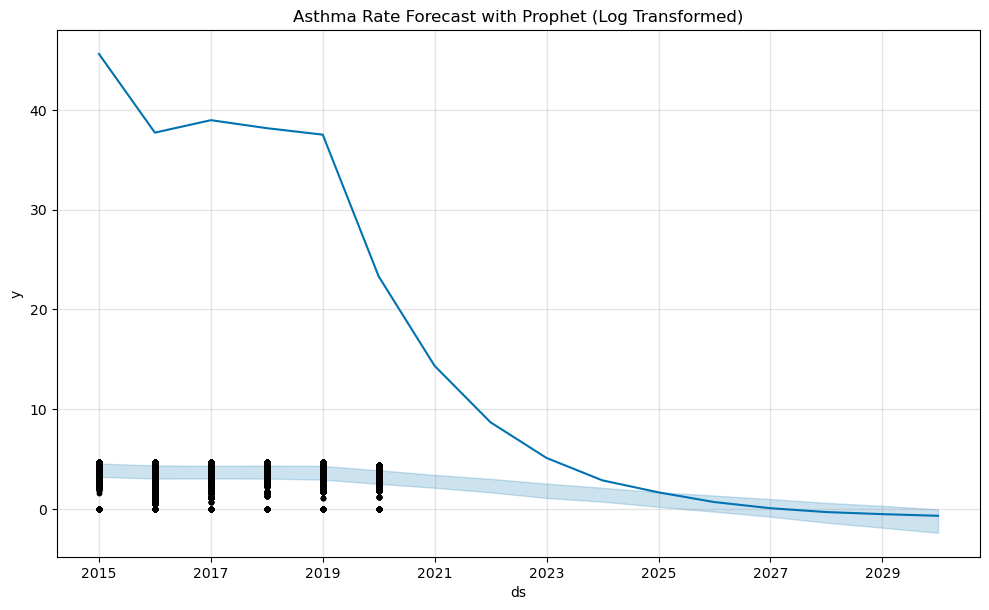

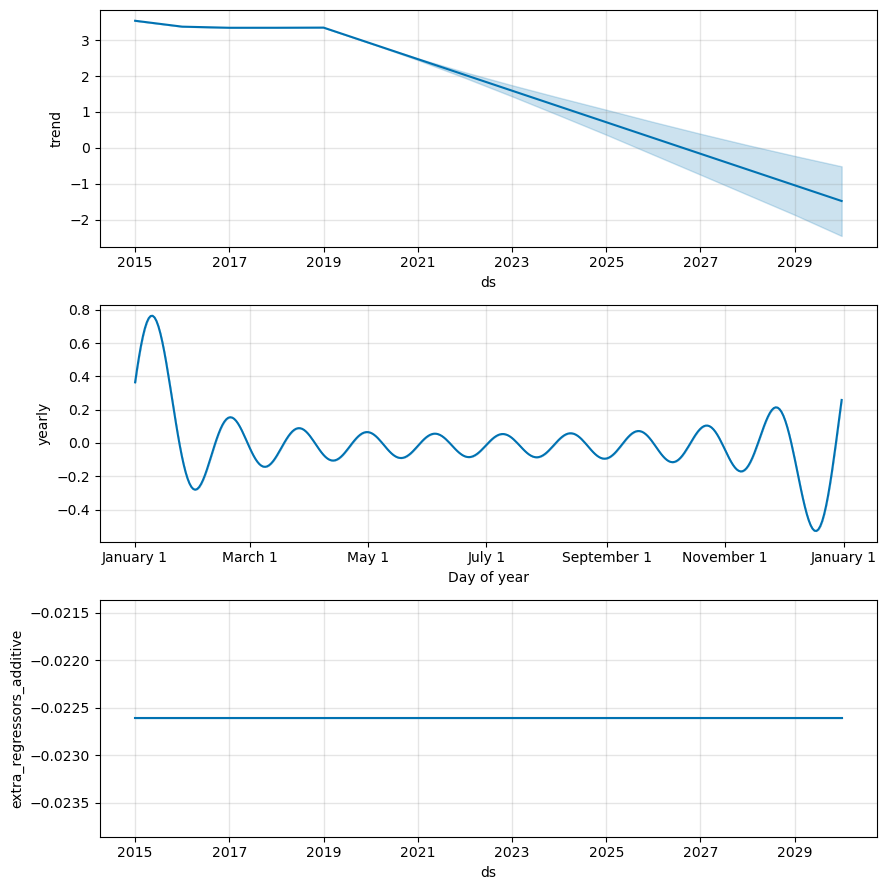

Prophet model updated successfully!


In [30]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df.sort_values(by='Year')

# Select relevant features
df_prophet = df[['Year', 'Pollution_Index', 'EPA_PM25_Mean', 'Asthma_Rate']].copy()
df_prophet.rename(columns={'Year': 'ds', 'Asthma_Rate': 'y'}, inplace=True)

# Handle missing values
df_prophet['y'] = df_prophet['y'].fillna(df_prophet['y'].median())
df_prophet['Pollution_Index'] = df_prophet['Pollution_Index'].fillna(df_prophet['Pollution_Index'].median())
df_prophet['EPA_PM25_Mean'] = df_prophet['EPA_PM25_Mean'].fillna(df_prophet['EPA_PM25_Mean'].median())

# Remove outliers using IQR method
Q1 = df_prophet['y'].quantile(0.25)
Q3 = df_prophet['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_prophet = df_prophet[(df_prophet['y'] >= lower_bound) & (df_prophet['y'] <= upper_bound)]

# Apply log transformation to 'y' to prevent negative values
df_prophet['y'] = np.log1p(df_prophet['y'])

# Initialize Prophet model
model = Prophet()

# Add pollution-related external regressors
model.add_regressor('Pollution_Index')
model.add_regressor('EPA_PM25_Mean')

# Fit the model
model.fit(df_prophet)

# Create future dates
df_future = model.make_future_dataframe(periods=10, freq='YE')
df_future['Pollution_Index'] = df_prophet['Pollution_Index'].median()
df_future['EPA_PM25_Mean'] = df_prophet['EPA_PM25_Mean'].median()

# Predict future values
df_forecast = model.predict(df_future)

# Convert log-transformed values back to original scale
df_forecast['yhat'] = np.expm1(df_forecast['yhat'])

# Plot forecast
model.plot(df_forecast)
plt.title("Asthma Rate Forecast with Prophet (Log Transformed)")
plt.show()

# Plot components
model.plot_components(df_forecast)
plt.show()

print("Prophet model updated successfully!")


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create a dataframe with future dates that match only the training data for evaluation
df_eval = df_prophet.copy()

# Make predictions on training set
forecast_train = model.predict(df_eval)

# Convert predictions back from log scale
y_true = np.expm1(df_eval['y'])  # Actual asthma rates
y_pred = np.expm1(forecast_train['yhat'])  # Predicted asthma rates

# Calculate accuracy metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 14.33
Root Mean Squared Error (RMSE): 19.14
R² Score: 0.1088


In [136]:
import numpy as np

df_selected['Log_PM25'] = np.log1p(df_selected['EPA_PM25_Mean'])
df_selected['Log_Pollution_Index'] = np.log1p(df_selected['Pollution_Index'])
df_selected['Log_Asthma_Rate'] = np.log1p(df_selected['Asthma_Rate'])
df_selected['Log_COPD_Rate'] = np.log1p(df_selected['COPD_Rate'])


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\koush\AppData\Local\Temp\ipykernel_14808\2241176492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Log_PM25'] = np.log1p(df_selected['EPA_PM25_Mean'])
C:\Users\koush\AppData\Local\Temp\ipykernel_14808\2241176492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Log_Pollution_Index'] = np.log1

14:17:13 - cmdstanpy - INFO - Chain [1] start processing
14:17:32 - cmdstanpy - INFO - Chain [1] done processing


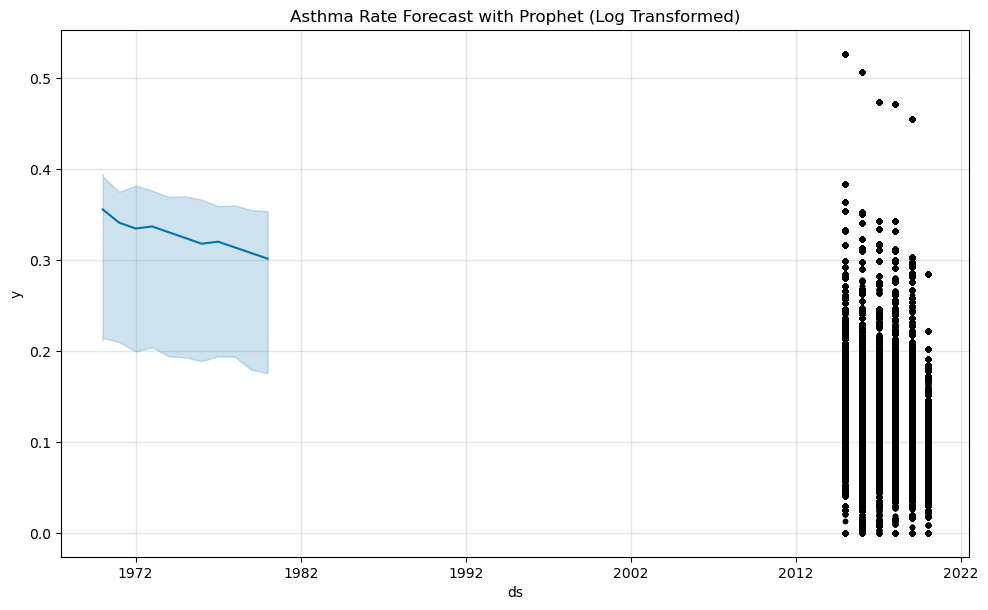

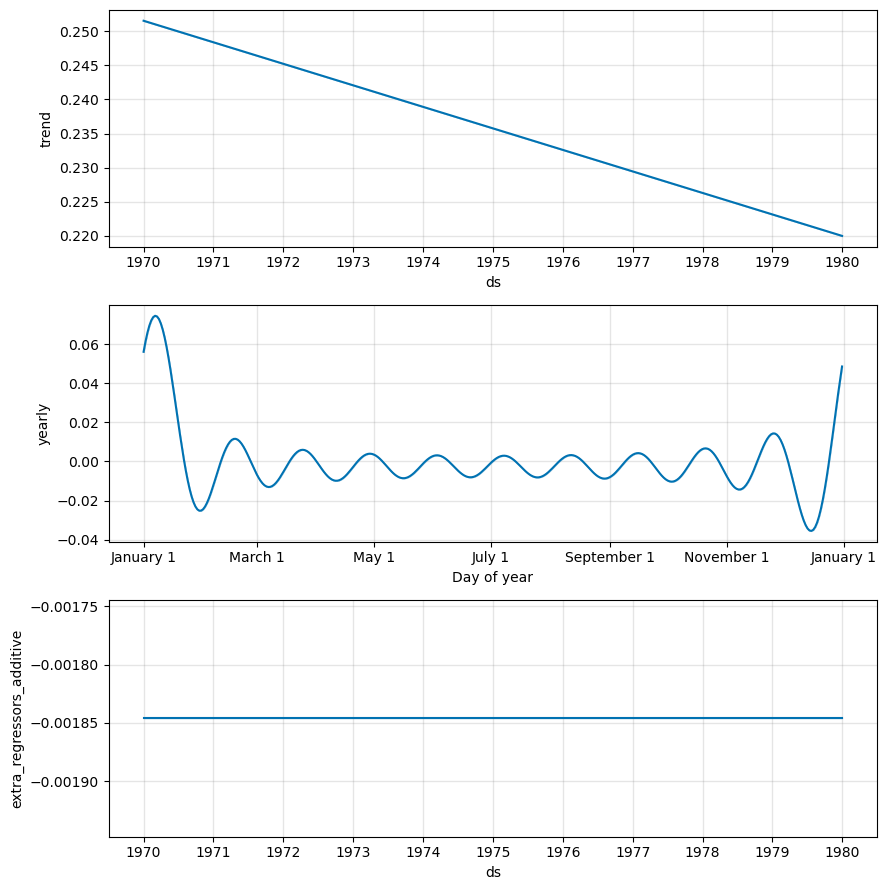

Prophet model updated successfully!


In [33]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df.sort_values(by='Year')

# Select relevant features
df_prophet = df_selected[['Year', 'Log_Pollution_Index', 'Log_PM25', 'Log_Asthma_Rate']].copy()
df_prophet.rename(columns={'Year': 'ds', 'Log_Asthma_Rate': 'y'}, inplace=True)

# Handle missing values
df_prophet['y'] = df_prophet['y'].fillna(df_prophet['y'].median())
df_prophet['Log_Pollution_Index'] = df_prophet['Log_Pollution_Index'].fillna(df_prophet['Log_Pollution_Index'].median())
df_prophet['Log_PM25'] = df_prophet['Log_PM25'].fillna(df_prophet['Log_PM25'].median())



# Apply log transformation to 'y' to prevent negative values
df_prophet['y'] = np.log1p(df_prophet['y'])

# Initialize Prophet model
model = Prophet()

# Add pollution-related external regressors
model.add_regressor('Log_Pollution_Index')
model.add_regressor('Log_PM25')

# Fit the model
model.fit(df_prophet)

# Create future dates
df_future = model.make_future_dataframe(periods=10, freq='YE')
df_future['Log_Pollution_Index'] = df_prophet['Log_Pollution_Index'].median()
df_future['Log_PM25'] = df_prophet['Log_PM25'].median()

# Predict future values
df_forecast = model.predict(df_future)

# Convert log-transformed values back to original scale
df_forecast['yhat'] = np.expm1(df_forecast['yhat'])

# Plot forecast
model.plot(df_forecast)
plt.title("Asthma Rate Forecast with Prophet (Log Transformed)")
plt.show()

# Plot components
model.plot_components(df_forecast)
plt.show()

print("Prophet model updated successfully!")


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create a dataframe with future dates that match only the training data for evaluation
df_eval = df_prophet.copy()

# Make predictions on training set
forecast_train = model.predict(df_eval)

# Convert predictions back from log scale
y_true = np.expm1(df_eval['y'])  # Actual asthma rates
y_pred = np.expm1(forecast_train['yhat'])  # Predicted asthma rates

# Calculate accuracy metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.06
Root Mean Squared Error (RMSE): 0.08
R² Score: 0.1063


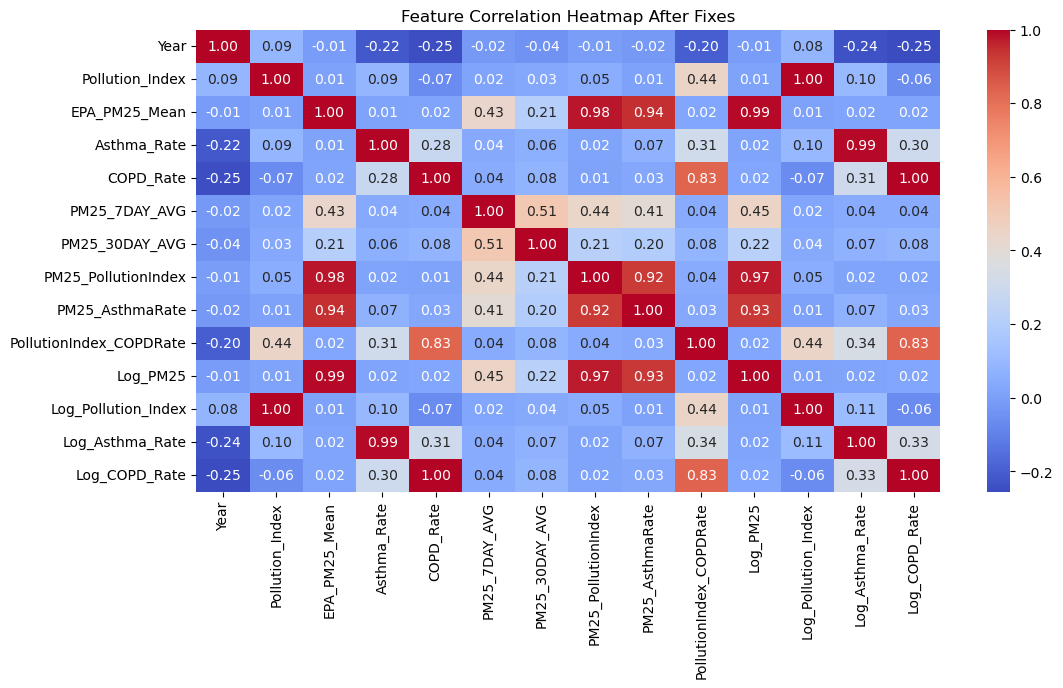

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_selected is your DataFrame
# Step 1: Select only numeric columns
df_numeric = df_selected.select_dtypes(include=['float64', 'int64'])

# Step 2: Generate the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap After Fixes")
plt.show()

In [36]:
#checking skewness
numerical_cols = ['Pollution_Index', 'EPA_PM25_Mean', 'Asthma_Rate', 'COPD_Rate', 
                  'PM25_7DAY_AVG', 'PM25_PollutionIndex', 
                  'PM25_AsthmaRate', 'PollutionIndex_COPDRate']

# Compute skewness
skewness_values = df_selected[numerical_cols].skew()
skewness_values

Pollution_Index             1.650823
EPA_PM25_Mean              66.552960
Asthma_Rate                 3.023296
COPD_Rate                   1.890579
PM25_7DAY_AVG              15.880612
PM25_PollutionIndex        60.668562
PM25_AsthmaRate            72.588614
PollutionIndex_COPDRate     1.490089
dtype: float64

In [37]:
# Drop unnecessary features
columns_to_drop = ['Asthma_Rate','COPD_Rate']
df_selected = df_selected.drop(columns=columns_to_drop, axis=1)

# Verify the remaining columns
print("Remaining features after feature selection:\n", df_selected.columns)


Remaining features after feature selection:
 Index(['State', 'County', 'Year', 'Pollution_Index', 'EPA_PM25_Mean',
       'AQI_Category', 'PM25_7DAY_AVG', 'PM25_30DAY_AVG',
       'PM25_PollutionIndex', 'PM25_AsthmaRate', 'PollutionIndex_COPDRate',
       'Log_PM25', 'Log_Pollution_Index', 'Log_Asthma_Rate', 'Log_COPD_Rate'],
      dtype='object')


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Selecting only numerical features
X = df_selected.select_dtypes(include=[np.number])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF scores
print(vif_data)


                    Feature          VIF
0                      Year    69.249247
1           Pollution_Index  1477.304665
2             EPA_PM25_Mean   119.582493
3             PM25_7DAY_AVG     1.795880
4            PM25_30DAY_AVG     1.665729
5       PM25_PollutionIndex    24.880669
6           PM25_AsthmaRate    10.039222
7   PollutionIndex_COPDRate    56.148882
8                  Log_PM25    93.463075
9       Log_Pollution_Index  1846.526640
10          Log_Asthma_Rate     4.702370
11            Log_COPD_Rate    60.069019


In [39]:
pip install --upgrade numpy statsmodels


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [40]:
#feature selection removing less importamce fearues 
new_features = ['Year', 'PM25_AsthmaRate', 
                     'Log_PM25', 'Log_Pollution_Index','Log_COPD_Rate']

In [41]:
#for knowing feature importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the cleaned dataset (assuming you have it as df_selected)
# Ensure you only use the features with acceptable VIF scores
selected_features = ['Year', 'PM25_30DAY_AVG', 'PM25_AsthmaRate', 
                     'Log_PM25', 'Log_Pollution_Index','Log_COPD_Rate']

# Define X (features) and y (target variable)
X = df_selected[new_features]
y = df_selected['Log_Asthma_Rate']

In [42]:


# Save feature names before conversion
feature_names = X.columns.tolist()  
print(feature_names)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

print(f"Number of features: {len(feature_names)}")



['Year', 'PM25_AsthmaRate', 'Log_PM25', 'Log_Pollution_Index', 'Log_COPD_Rate']
Number of features: 5


C:\Users\koush\AppData\Local\Temp\ipykernel_14808\2183515494.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette="coolwarm")


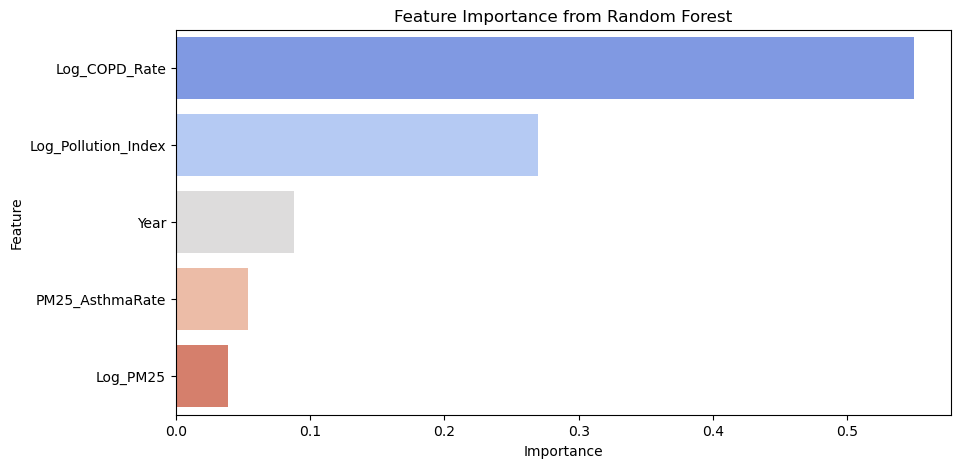

In [43]:
# Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importance = rf_model.feature_importances_
feature_df = pd.DataFrame({'Feature': new_features, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette="coolwarm")
plt.title("Feature Importance from Random Forest")
plt.show()

In [44]:
pip install pystan fbprophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.9.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.9.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pystan-3.7.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.6.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.5.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.4.0-py3-none-any.whl.metadata (3.7 kB)
INFO: pip is still looking at multiple versions of pystan t

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\koush\AppData\Local\Temp\pip-install-duo0xg88\pystan_a0cbf290ea5b4bb3a19e32be179d7cf3\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [45]:
'''pip install bsts'''

'pip install bsts'

In [46]:
'''import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

tfd = tfp.distributions
tfb = tfp.bijectors
sts = tfp.sts
'''

'import numpy as np\nimport pandas as pd\nimport tensorflow as tf\nimport tensorflow_probability as tfp\nimport matplotlib.pyplot as plt\n\ntfd = tfp.distributions\ntfb = tfp.bijectors\nsts = tfp.sts\n'

In [47]:
'''# Assume 'Year' is the time index
df = df_selected[['Year', 'PM25_30DAY_AVG', 'Log_Pollution_Index', 'Log_Asthma_Rate', 'Log_COPD_Rate']]

# Set 'Year' as index
df.set_index('Year', inplace=True)

# Define target variable (Y) and predictors (X)
y = df['Log_Asthma_Rate'].values.astype(np.float32)  # Response variable
X = df.drop(columns=['Log_Asthma_Rate']).values.astype(np.float32)  # Predictors

# Train-test split
train_size = int(0.8 * len(df))
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]'''


"# Assume 'Year' is the time index\ndf = df_selected[['Year', 'PM25_30DAY_AVG', 'Log_Pollution_Index', 'Log_Asthma_Rate', 'Log_COPD_Rate']]\n\n# Set 'Year' as index\ndf.set_index('Year', inplace=True)\n\n# Define target variable (Y) and predictors (X)\ny = df['Log_Asthma_Rate'].values.astype(np.float32)  # Response variable\nX = df.drop(columns=['Log_Asthma_Rate']).values.astype(np.float32)  # Predictors\n\n# Train-test split\ntrain_size = int(0.8 * len(df))\ny_train, y_test = y[:train_size], y[train_size:]\nX_train, X_test = X[:train_size], X[train_size:]"

In [48]:
'''# Define trend and regression components
trend_component = sts.LocalLinearTrend(observed_time_series=y_train)
regression_component = sts.LinearRegression(design_matrix=X_train)

# Build the full BSTS model
bsts_model = sts.Sum([trend_component, regression_component], observed_time_series=y_train)'''


'# Define trend and regression components\ntrend_component = sts.LocalLinearTrend(observed_time_series=y_train)\nregression_component = sts.LinearRegression(design_matrix=X_train)\n\n# Build the full BSTS model\nbsts_model = sts.Sum([trend_component, regression_component], observed_time_series=y_train)'

In [49]:
'''# Variational inference for Bayesian estimation
variational_posteriors = tfp.sts.build_factored_surrogate_posterior(model=bsts_model)

# Optimize
num_variational_steps = 100
elbo_loss = tfp.vi.fit_surrogate_posterior(
    target_log_prob_fn=bsts_model.joint_distribution(observed_time_series=y_train).log_prob,
    surrogate_posterior=variational_posteriors,
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    num_steps=num_variational_steps
)'''



'# Variational inference for Bayesian estimation\nvariational_posteriors = tfp.sts.build_factored_surrogate_posterior(model=bsts_model)\n\n# Optimize\nnum_variational_steps = 100\nelbo_loss = tfp.vi.fit_surrogate_posterior(\n    target_log_prob_fn=bsts_model.joint_distribution(observed_time_series=y_train).log_prob,\n    surrogate_posterior=variational_posteriors,\n    optimizer=tf.optimizers.Adam(learning_rate=0.1),\n    num_steps=num_variational_steps\n)'

In [50]:
# Number of time steps to forecast (same length as y_test)
'''num_steps_forecast = len(y_test)

# Forecast future values
forecast_dist = tfp.sts.forecast(
    model=bsts_model,
    observed_time_series=y_train,
    parameter_samples=samples,
    num_steps_forecast=num_steps_forecast  # ✅ Required argument
)

# Extract mean forecast
predictions = forecast_dist.mean().numpy()'''


'num_steps_forecast = len(y_test)\n\n# Forecast future values\nforecast_dist = tfp.sts.forecast(\n    model=bsts_model,\n    observed_time_series=y_train,\n    parameter_samples=samples,\n    num_steps_forecast=num_steps_forecast  # ✅ Required argument\n)\n\n# Extract mean forecast\npredictions = forecast_dist.mean().numpy()'

In [51]:
#XGBoost
from sklearn.preprocessing import StandardScaler

# Standardize features (optional but improves performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
from xgboost import XGBRegressor

# Initialize model with hyperparameters
xgb_model = XGBRegressor(
    objective='reg:squarederror',  # Suitable for regression
    n_estimators=200,              # Number of trees
    learning_rate=0.05,            # Step size shrinkage
    max_depth=6,                   # Tree depth (controls complexity)
    subsample=0.8,                  # Prevents overfitting
    colsample_bytree=0.8            # Randomly select features per tree
)

# Train model
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [53]:
'''from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"📊 Model Performance:")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 RMSE: {rmse:.4f}")'''


'from sklearn.metrics import mean_absolute_error, mean_squared_error\n\n# Compute errors\nmae = mean_absolute_error(y_test, y_pred)\nmse = mean_squared_error(y_test, y_pred)\nrmse = mse ** 0.5\n\nprint(f"📊 Model Performance:")\nprint(f"🔹 MAE: {mae:.4f}")\nprint(f"🔹 RMSE: {rmse:.4f}")'

In [54]:
'''import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual', color='blue')  # ✅ Remove `.values`
plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
plt.legend()
plt.title("XGBoost Predictions vs. Actual")
plt.show()
'''


'import matplotlib.pyplot as plt\n\nplt.figure(figsize=(12,6))\nplt.plot(y_test, label=\'Actual\', color=\'blue\')  # ✅ Remove `.values`\nplt.plot(y_pred, label=\'Predicted\', color=\'red\', linestyle=\'dashed\')\nplt.legend()\nplt.title("XGBoost Predictions vs. Actual")\nplt.show()\n'

In [55]:
'''mae_percentage = (0.0144 / y_test.mean()) * 100
rmse_percentage = (0.0216 / y_test.mean()) * 100
print(f"MAE is {mae_percentage:.2f}% of the target mean")
print(f"RMSE is {rmse_percentage:.2f}% of the target mean")
'''

'mae_percentage = (0.0144 / y_test.mean()) * 100\nrmse_percentage = (0.0216 / y_test.mean()) * 100\nprint(f"MAE is {mae_percentage:.2f}% of the target mean")\nprint(f"RMSE is {rmse_percentage:.2f}% of the target mean")\n'

In [56]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Define objective function
def objective(trial):
    params = {
        "objective": "reg:pseudohubererror",
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "lambda": trial.suggest_float("lambda", 1, 10),
    }

    # Train model
    model = xgb.XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    # Predict & evaluate
    preds = model.predict(X_val)
    return mean_absolute_error(y_val, preds)

# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)




In [57]:
best_params ={'objective': 'reg:pseudohubererror',
'n_estimators': 450, 'learning_rate': 0.19162317815250018, 'max_depth': 10, 'subsample': 0.832936400759728, 'colsample_bytree': 0.9238838786551008, 'gamma': 0.008750235959076869, 'lambda': 6.605063925327751}# Train the model

In [58]:
import xgboost as xgb

# Train the model
xgb_model = xgb.XGBRegressor(**best_params)
xgb_model.fit(X_train, y_train)

# Ensure correct feature importance
importance = xgb_model.feature_importances_
print(f"Feature Importance Count: {len(importance)}")


Feature Importance Count: 5


In [59]:
'''# Predict on test set
y_pred = xgb_model.predict(X_test_scaled)'''

'# Predict on test set\ny_pred = xgb_model.predict(X_test_scaled)'

In [60]:
'''study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best Parameters
best_params = study.best_params
print("Best parameters:", best_params)'''

'study = optuna.create_study(direction="minimize")\nstudy.optimize(objective, n_trials=50)\n\n# Best Parameters\nbest_params = study.best_params\nprint("Best parameters:", best_params)'

In [61]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Use the best parameters from Optuna
best_params ={'objective': 'reg:pseudohubererror',
'n_estimators': 450, 'learning_rate': 0.19162317815250018, 'max_depth': 10, 'subsample': 0.832936400759728, 'colsample_bytree': 0.9238838786551008, 'gamma': 0.008750235959076869, 'lambda': 6.605063925327751}# Train the model
model = xgb.XGBRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 Optimized Model Performance:")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 RMSE: {rmse:.4f}")


📊 Optimized Model Performance:
🔹 MAE: 0.0079
🔹 RMSE: 0.0120


In [63]:
'''import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Samples')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()'''


"import matplotlib.pyplot as plt\n\nplt.figure(figsize=(12,6))\nplt.plot(y_test, label='Actual', color='blue')\nplt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')\nplt.xlabel('Samples')\nplt.ylabel('Target Variable')\nplt.title('Actual vs Predicted Values')\nplt.legend()\nplt.show()"

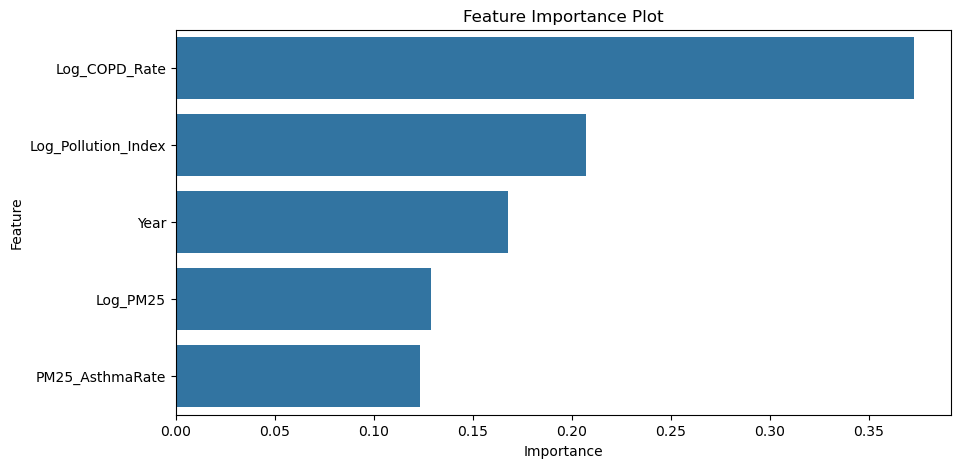

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure feature importance and feature names match in length
if len(feature_names) == len(importance):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
else:
    print("Mismatch in feature importance and feature names!")

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance Plot")
plt.show()


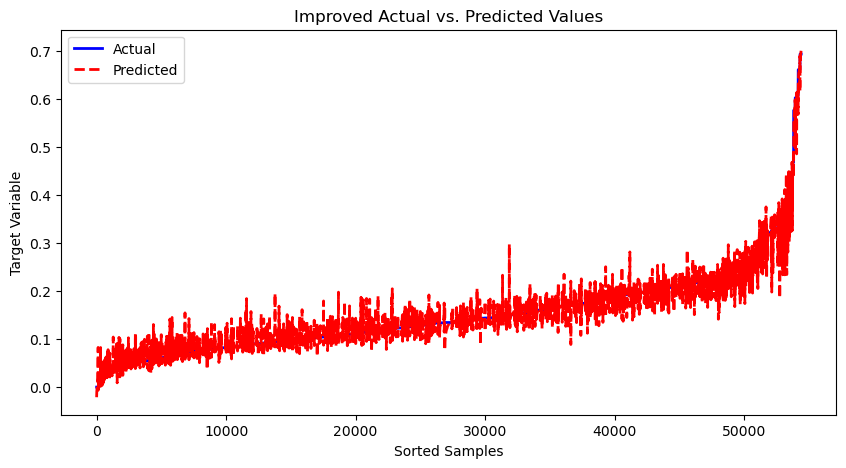

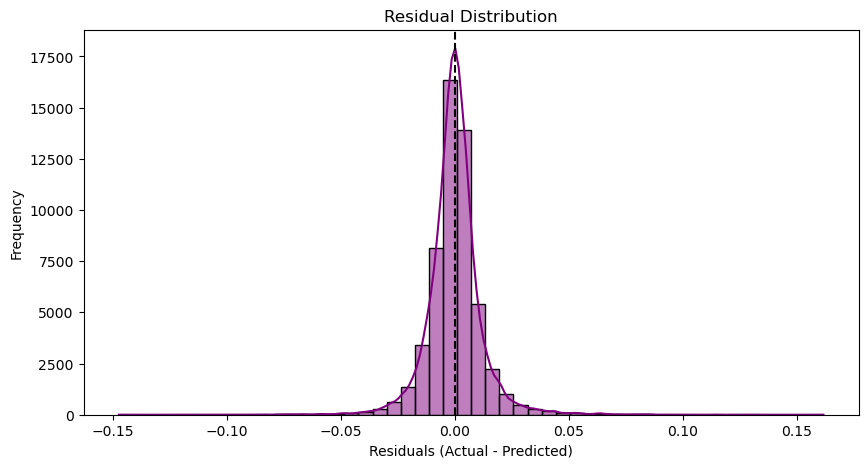

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming y_test and y_pred are numpy arrays
y_test_sorted, y_pred_sorted = zip(*sorted(zip(y_test, y_pred)))  

# Plot sorted actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test_sorted, label="Actual", color="blue", linewidth=2)
plt.plot(y_pred_sorted, label="Predicted", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Sorted Samples")
plt.ylabel("Target Variable")
plt.title("Improved Actual vs. Predicted Values")
plt.legend()
plt.show()

# --- Residual Plot ---
residuals = np.array(y_test) - np.array(y_pred)
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=50, color="purple")
plt.axvline(0, color='black', linestyle='dashed')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()



In [66]:
print(model.get_params()["objective"])


reg:pseudohubererror


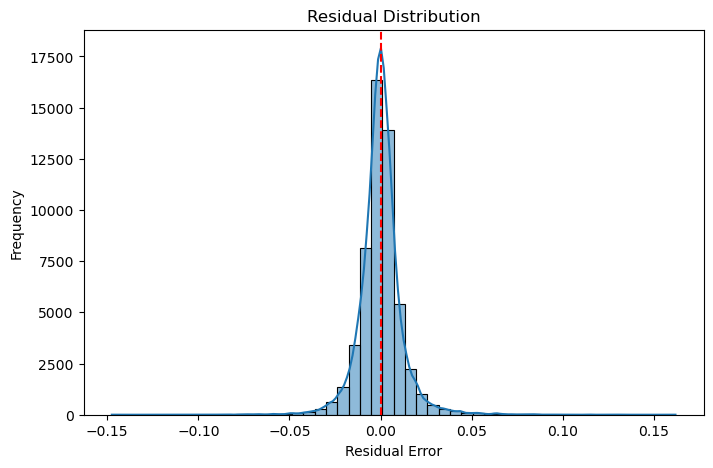

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred  # Errors

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.title("Residual Distribution")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.show()


In [68]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [69]:
pip uninstall numpy -y


Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install numpy==1.26.4


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



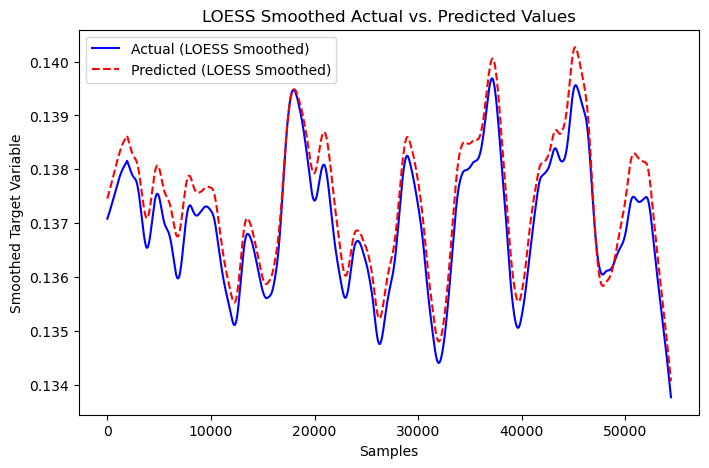

In [71]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Sort values by X-axis (sample index) to get a meaningful trend
sorted_indices = np.argsort(np.arange(len(y_test)))
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = np.array(y_pred)[sorted_indices]

# Apply LOESS smoothing
frac = 0.07 # Adjust smoothness (0.05-0.3 recommended)
y_test_loess = sm.nonparametric.lowess(y_test_sorted, np.arange(len(y_test)), frac=frac)[:, 1]
y_pred_loess = sm.nonparametric.lowess(y_pred_sorted, np.arange(len(y_pred)), frac=frac)[:, 1]

# Plot smoothed Actual vs. Predicted
plt.figure(figsize=(8,5))
plt.plot(y_test_loess, label='Actual (LOESS Smoothed)', color='blue')
plt.plot(y_pred_loess, label='Predicted (LOESS Smoothed)', color='red', linestyle="dashed")
plt.xlabel("Samples")
plt.ylabel("Smoothed Target Variable")
plt.legend()
plt.title("LOESS Smoothed Actual vs. Predicted Values")
plt.show()


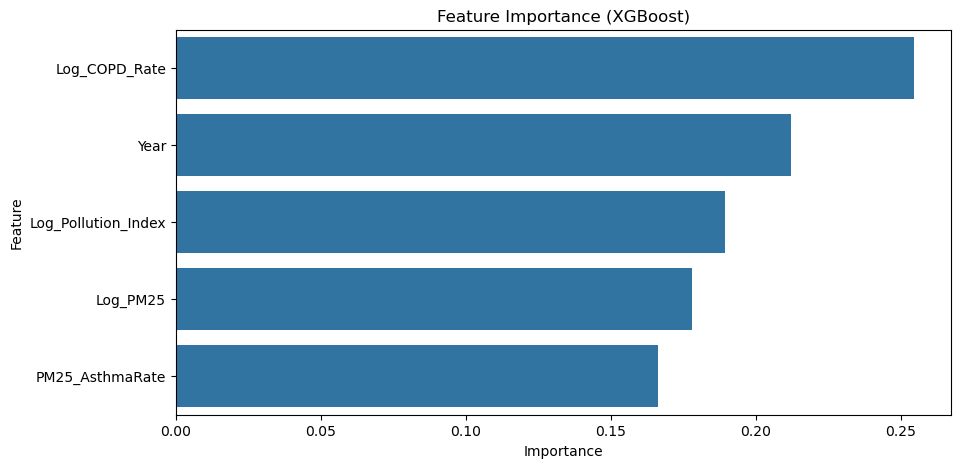

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure model has feature importances
xgb_importance = model.feature_importances_

# Ensure X_train is a DataFrame
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)

# Extract feature names
feature_names = X_train.columns  # Ensure correct names

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importance})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance (XGBoost)")
plt.show()


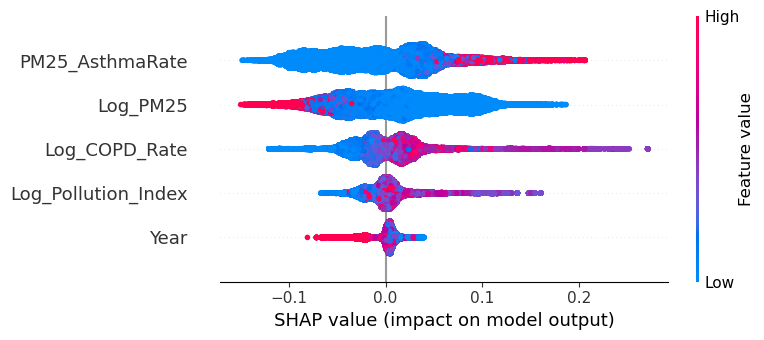

In [73]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# Plot the SHAP summary with feature names
shap.summary_plot(shap_values, X_train, feature_names=feature_names)


In [74]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [75]:
print(type(X_train))
print(X_train.shape)


<class 'pandas.core.frame.DataFrame'>
(217613, 5)


In [76]:
#feature selection removing less importamce fearues 
new_features = ['Year', 'PM25_AsthmaRate', 
                     'Log_PM25', 'Log_Pollution_Index','Log_COPD_Rate']

In [77]:
actual_values = y_test.values  # If y_test is a Pandas Series
predicted_values = model.predict(X_test)  # Use your trained model


In [78]:
#cross validation
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define k-fold cross-validation (e.g., k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost model with best params
model = xgb.XGBRegressor(**best_params, random_state=42)

# Perform cross-validation (scoring = 'neg_mean_absolute_error' & 'neg_root_mean_squared_error')
mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Convert negative scores to positive
mae_scores = -mae_scores
rmse_scores = -rmse_scores

# Print results
print(f"📊 Cross-Validation Results:")
print(f"🔹 Mean MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"🔹 Mean RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")


📊 Cross-Validation Results:
🔹 Mean MAE: 0.0086 ± 0.0001
🔹 Mean RMSE: 0.0132 ± 0.0002


📊 Optimized Model Performance:
🔹 MAE: 0.0070
🔹 RMSE: 0.0110


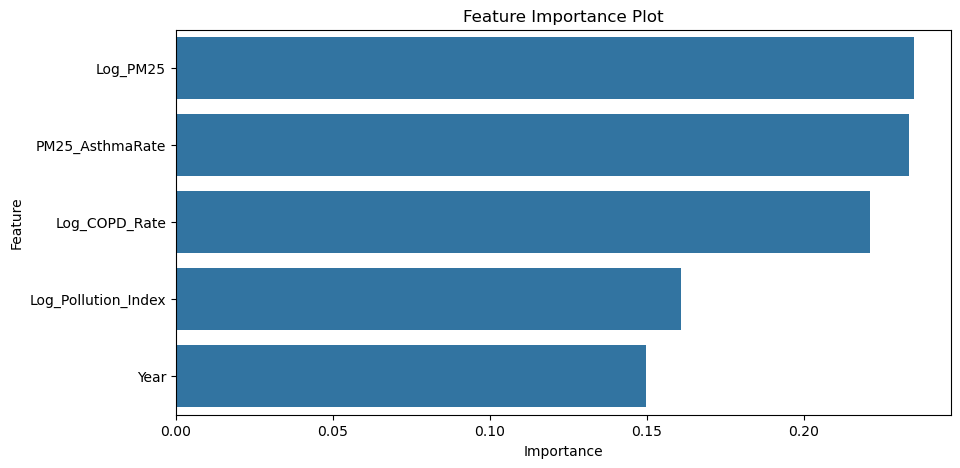

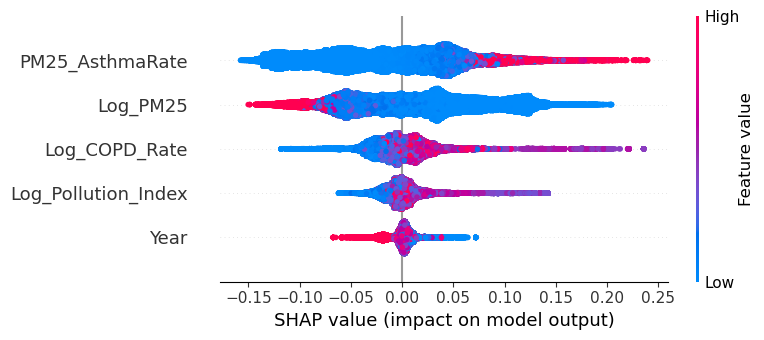

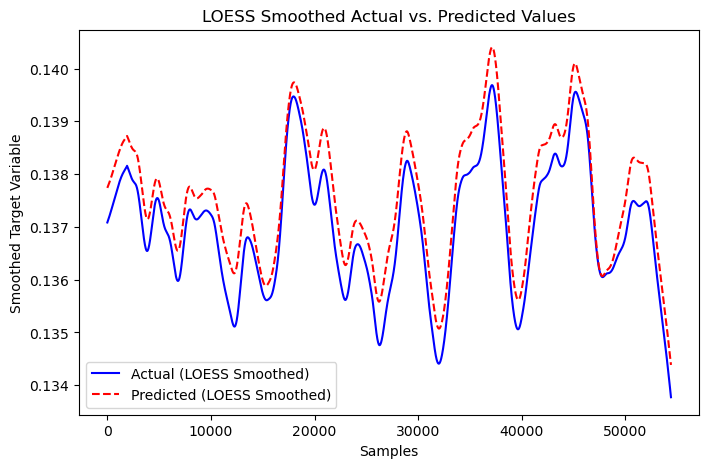

📊 Cross-Validation Results:
🔹 Mean MAE: 0.0321 ± 0.0036
🔹 Mean RMSE: 0.0529 ± 0.0080


In [79]:
#hyper-tuning
import numpy as np
import pandas as pd
import xgboost as xgb
import shap
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset (replace with actual dataset loading)
# df = pd.read_csv('your_data.csv')
X = df_selected[new_features]
y = df_selected['Log_Asthma_Rate']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best hyperparameters from tuning
best_params = {
    'objective': 'reg:pseudohubererror',
    'n_estimators': 950,
    'learning_rate': 0.0824,
    'max_depth': 8,
    'subsample': 0.8567,
    'colsample_bytree': 0.6615,
    'gamma': 0.0033,
    'lambda': 5.14,
    'random_state': 42
}

# Train model
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"📊 Optimized Model Performance:\n🔹 MAE: {mae:.4f}\n🔹 RMSE: {rmse:.4f}")

# Feature Importance (XGBoost)
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance Plot")
plt.show()

# SHAP Analysis
explainer = shap.Explainer(model)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

# LOESS Smoothed Actual vs. Predicted
sorted_indices = np.argsort(np.arange(len(y_test)))
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = np.array(y_pred)[sorted_indices]
frac = 0.07  # Adjust smoothness
y_test_loess = sm.nonparametric.lowess(y_test_sorted, np.arange(len(y_test)), frac=frac)[:, 1]
y_pred_loess = sm.nonparametric.lowess(y_pred_sorted, np.arange(len(y_pred)), frac=frac)[:, 1]
plt.figure(figsize=(8, 5))
plt.plot(y_test_loess, label='Actual (LOESS Smoothed)', color='blue')
plt.plot(y_pred_loess, label='Predicted (LOESS Smoothed)', color='red', linestyle="dashed")
plt.xlabel("Samples")
plt.ylabel("Smoothed Target Variable")
plt.legend()
plt.title("LOESS Smoothed Actual vs. Predicted Values")
plt.show()

# Cross-Validation
cv_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
cv_rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
print(f"📊 Cross-Validation Results:\n🔹 Mean MAE: {abs(cv_mae.mean()):.4f} ± {cv_mae.std():.4f}\n🔹 Mean RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")


In [80]:

#future prediction 
import pandas as pd

# Convert dataset to DataFrame (if not already)
df = pd.DataFrame(X_train)  # Assuming X_train is a NumPy array

# Add target variable to the dataset
df['Log_Asthma_Rate'] = y_train

# Create lag features (previous time steps as inputs)
lags = 5  # Number of past values to use as features
for i in range(1, lags + 1):
    df[f'Lag_{i}'] = df['Log_Asthma_Rate'].shift(i)

# Drop rows with NaN values (first 'lags' rows)
df = df.dropna()

# Define new input features and target
X_new = df.drop(columns=['Log_Asthma_Rate'])
y_new = df['Log_Asthma_Rate']


In [81]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the data into train & test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Train the model
model = xgb.XGBRegressor(n_estimators=950, learning_rate=0.08, max_depth=8, subsample=0.85, colsample_bytree=0.66)
model.fit(X_train_new, y_train_new)

# Make predictions
y_pred_new = model.predict(X_test_new)


In [82]:
import numpy as np

# Take the most recent row of data
latest_data = X_new.iloc[-1:].values  # Convert to NumPy array

# Generate future predictions
future_predictions = []
num_predictions = 30  # Predict next 10 time steps

for _ in range(num_predictions):
    pred = model.predict(latest_data)
    future_predictions.append(pred[0])

    # Shift data for next prediction
    latest_data = np.roll(latest_data, shift=-1)
    latest_data[0, -1] = pred[0]  # Add new prediction to lag features


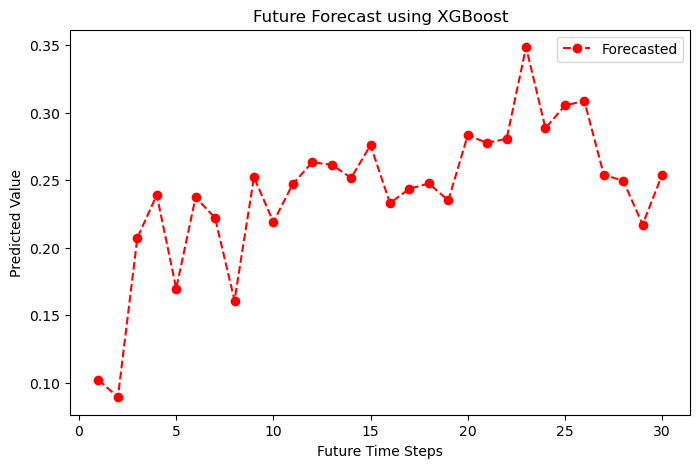

In [83]:
import matplotlib.pyplot as plt

# Plot future predictions
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_predictions + 1), future_predictions, marker='o', linestyle='dashed', color='red', label="Forecasted")
plt.xlabel("Future Time Steps")
plt.ylabel("Predicted Value")
plt.title("Future Forecast using XGBoost")
plt.legend()
plt.show()


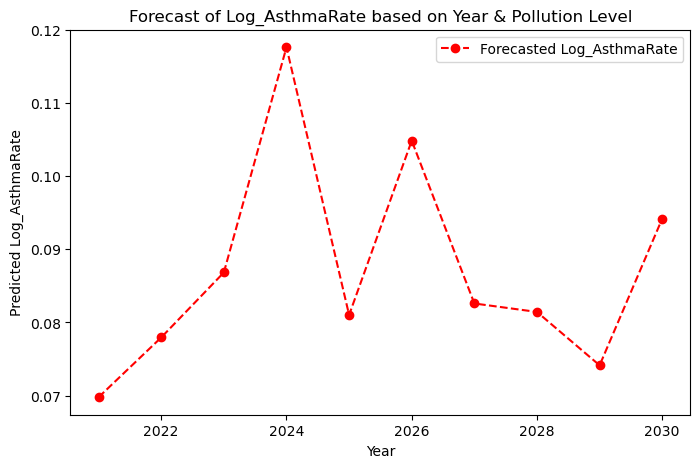

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assume 'data' is your dataset with 'Year', 'Pollution_Level', and 'Log_AsthmaRate'
# Replace 'Pollution_Level' with actual column name like 'PM25' or 'Log_Pollution_Index'

# Selecting relevant features
features = ['Year', 'Log_Pollution_Index', 'Log_PM25'] 
target = 'Log_Asthma_Rate'

# Splitting the dataset
X = df_selected[features]
y = df_selected[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Future predictions (next 10 years)
future_years = np.arange(df_selected['Year'].max() + 1, df_selected['Year'].max() + 11)

# Generate synthetic values for pollution levels
future_pollution = np.linspace(df_selected['Log_Pollution_Index'].min(), df_selected['Log_Pollution_Index'].max(), len(future_years))
future_pm25 = np.linspace(df_selected['Log_PM25'].min(), df_selected['Log_PM25'].max(), len(future_years))

# Create DataFrame with all features
future_data = pd.DataFrame({'Year': future_years, 'Log_Pollution_Index': future_pollution, 'Log_PM25': future_pm25})


future_forecast = model.predict(future_data)

# Plot the forecast
plt.figure(figsize=(8, 5))
plt.plot(future_years, future_forecast, marker='o', linestyle='dashed', color='red', label='Forecasted Log_AsthmaRate')
plt.xlabel('Year')
plt.ylabel('Predicted Log_AsthmaRate')
plt.title('Forecast of Log_AsthmaRate based on Year & Pollution Level')
plt.legend()
plt.show()


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.0439
Root Mean Squared Error (RMSE): 0.0642
R² Score: 0.4737


In [86]:
#feature selection using correlation
import pandas as pd

# Assuming df is your dataset containing Log_AsthmaRate, Log_PM25, and Log_Pollution_Index
correlation_matrix = df_selected[['Log_Asthma_Rate', 'Log_PM25', 'Log_Pollution_Index','Year']].corr()
print(correlation_matrix['Log_Asthma_Rate'])



Log_Asthma_Rate        1.000000
Log_PM25               0.019032
Log_Pollution_Index    0.110189
Year                  -0.237167
Name: Log_Asthma_Rate, dtype: float64


In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define features and target
X = df_selected[['Log_PM25', 'Log_Pollution_Index','Year']]
y = df_selected['Log_Asthma_Rate']

# Apply RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, y)

# Print feature ranking
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print(feature_ranking.sort_values('Ranking'))


               Feature  Ranking
0             Log_PM25        1
1  Log_Pollution_Index        2
2                 Year        3


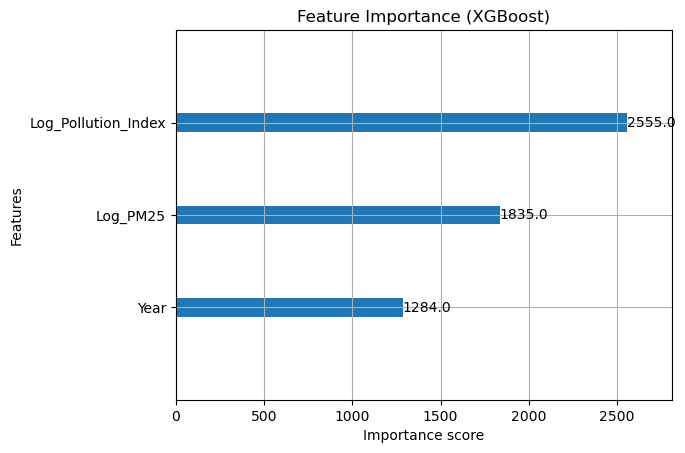

In [88]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train an XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, y)

# Plot feature importance
xgb.plot_importance(xgb_model)
plt.title("Feature Importance (XGBoost)")
plt.show()


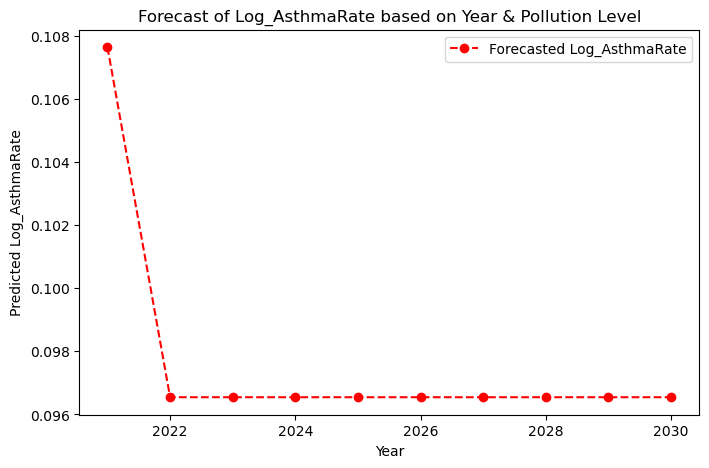

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assume 'data' is your dataset with 'Year', 'Pollution_Level', and 'Log_AsthmaRate'
# Replace 'Pollution_Level' with actual column name like 'PM25' or 'Log_Pollution_Index'

# Selecting relevant features
features = ['Year', 'Log_PM25']
target = 'Log_Asthma_Rate'

# Splitting the dataset
X = df_selected[features]
y = df_selected[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Future predictions (next 10 years)
future_years = np.arange(df_selected['Year'].max() + 1, df_selected['Year'].max() + 11)
predicted_pollution = np.linspace(df_selected['Log_PM25'].min(), df_selected['Log_PM25'].max(), len(future_years))
future_data = pd.DataFrame({'Year': future_years, 'Log_PM25': predicted_pollution})

future_forecast = model.predict(future_data)

# Plot the forecast
plt.figure(figsize=(8, 5))
plt.plot(future_years, future_forecast, marker='o', linestyle='dashed', color='red', label='Forecasted Log_AsthmaRate')
plt.xlabel('Year')
plt.ylabel('Predicted Log_AsthmaRate')
plt.title('Forecast of Log_AsthmaRate based on Year & Pollution Level')
plt.legend()
plt.show()


In [90]:
'''future_forecast_real = np.exp(future_forecast)''


In [101]:
'''pollution_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
pollution_model.fit(X[['Year']], X['Log_Pollution_Index'])

future_pollution = pollution_model.predict(future_years.reshape(-1, 1))'''


"pollution_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)\npollution_model.fit(X[['Year']], X['Log_Pollution_Index'])\n\nfuture_pollution = pollution_model.predict(future_years.reshape(-1, 1))"

In [ ]:
'''from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
'''

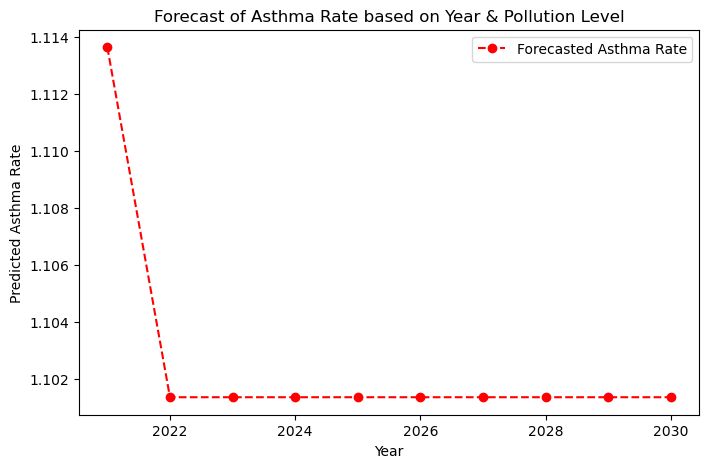

In [160]:
plt.figure(figsize=(8, 5))
plt.plot(future_years, future_forecast_real, marker='o', linestyle='dashed', color='red', label='Forecasted Asthma Rate')
plt.xlabel('Year')
plt.ylabel('Predicted Asthma Rate')
plt.title('Forecast of Asthma Rate based on Year & Pollution Level')
plt.legend()
plt.show()


In [134]:

features = ['Year', 'Log_Pollution_Index', 'Log_PM25', 'Log_COPD_Rate', 'PM25_AsthmaRate']
target = 'Log_Asthma_Rate'

MAE: 0.0080
MSE: 0.00016
R² Score: 0.9802


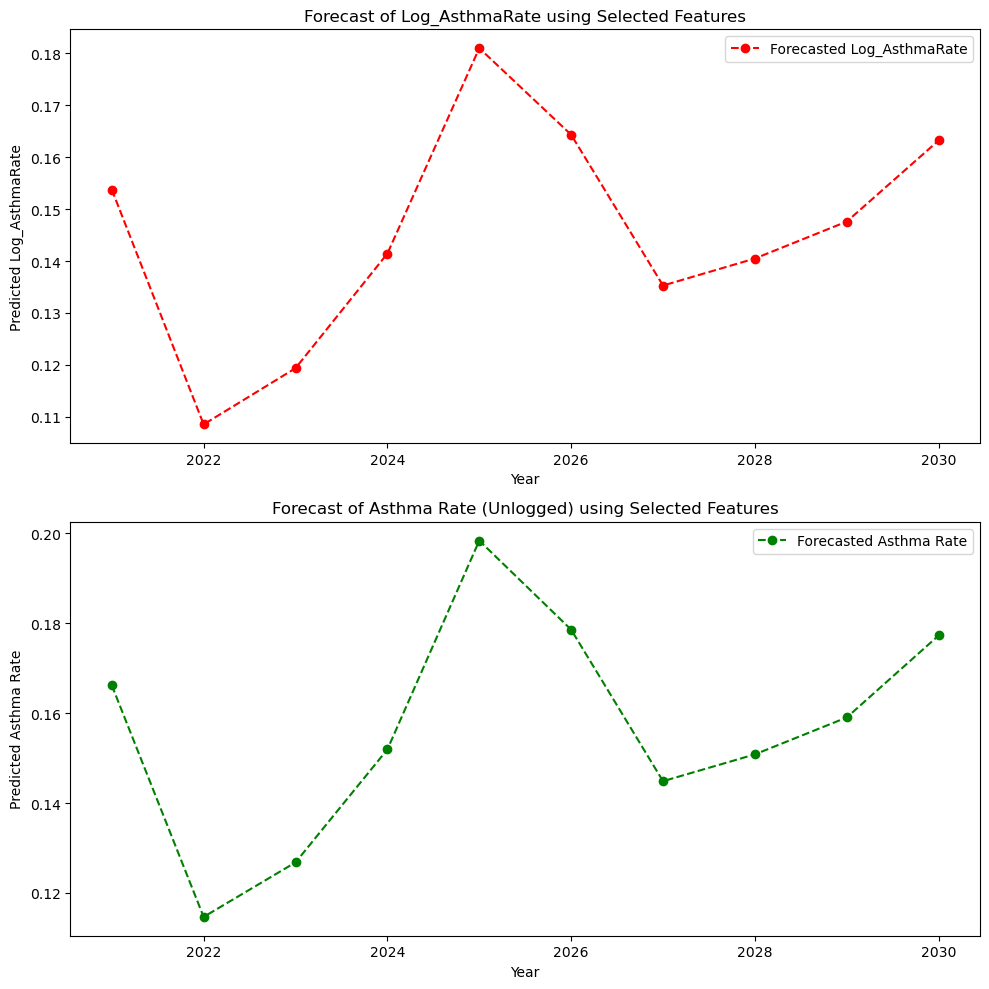

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Select features and target ---
features = ['Year', 'Log_Pollution_Index', 'Log_PM25', 'Log_COPD_Rate', 'PM25_AsthmaRate']
target = 'Log_Asthma_Rate'

# --- Prepare data ---
X = df_selected[features]
y = df_selected[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train model ---
model = xgb.XGBRegressor(objective='reg:squarederror', 
                         subsample=1.0, 
                         n_estimators=200, 
                         max_depth=7, 
                         learning_rate=0.1, 
                         gamma=0, 
                         colsample_bytree=0.8)
model.fit(X_train, y_train)

# --- Evaluate model ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.5f}")
print(f"R² Score: {r2:.4f}")

# --- Simulate future years ---
future_years = np.arange(df_selected['Year'].max() + 1, df_selected['Year'].max() + 11)

# Simulate feature trends for realism
predicted_pollution = np.linspace(df_selected['Log_Pollution_Index'].mean(), df_selected['Log_Pollution_Index'].mean() + 0.05, len(future_years))
predicted_pm25 = np.linspace(df_selected['Log_PM25'].mean(), df_selected['Log_PM25'].mean() + 0.04, len(future_years))
predicted_copd = np.linspace(df_selected['Log_COPD_Rate'].mean(), df_selected['Log_COPD_Rate'].mean() - 0.02, len(future_years))
predicted_asthma_pm25 = np.linspace(df_selected['PM25_AsthmaRate'].mean(), df_selected['PM25_AsthmaRate'].mean() + 0.03, len(future_years))

# --- Create future DataFrame ---
future_data = pd.DataFrame({
    'Year': future_years,
    'Log_Pollution_Index': predicted_pollution,
    'Log_PM25': predicted_pm25,
    'Log_COPD_Rate': predicted_copd,
    'PM25_AsthmaRate': predicted_asthma_pm25
})

# --- Predict future Log_Asthma_Rate ---
future_log_forecast = model.predict(future_data)

# --- Inverse log to get actual asthma rate ---
future_asthma_rate = np.expm1(future_log_forecast)

# --- Plot both Log and Unlogged Forecast ---
plt.figure(figsize=(10, 10))

# Plot 1 - Log Forecast
plt.subplot(2, 1, 1)
plt.plot(future_years, future_log_forecast, 'ro--', label='Forecasted Log_AsthmaRate')
plt.xlabel('Year')
plt.ylabel('Predicted Log_AsthmaRate')
plt.title('Forecast of Log_AsthmaRate using Selected Features')
plt.legend()

# Plot 2 - Actual Forecast
plt.subplot(2, 1, 2)
plt.plot(future_years, future_asthma_rate, 'go--', label='Forecasted Asthma Rate')
plt.xlabel('Year')
plt.ylabel('Predicted Asthma Rate')
plt.title('Forecast of Asthma Rate (Unlogged) using Selected Features')
plt.legend()

plt.tight_layout()
plt.show()



Ensemble MAE: 0.0073
Ensemble MSE: 0.00013
Ensemble R² Score: 0.9835


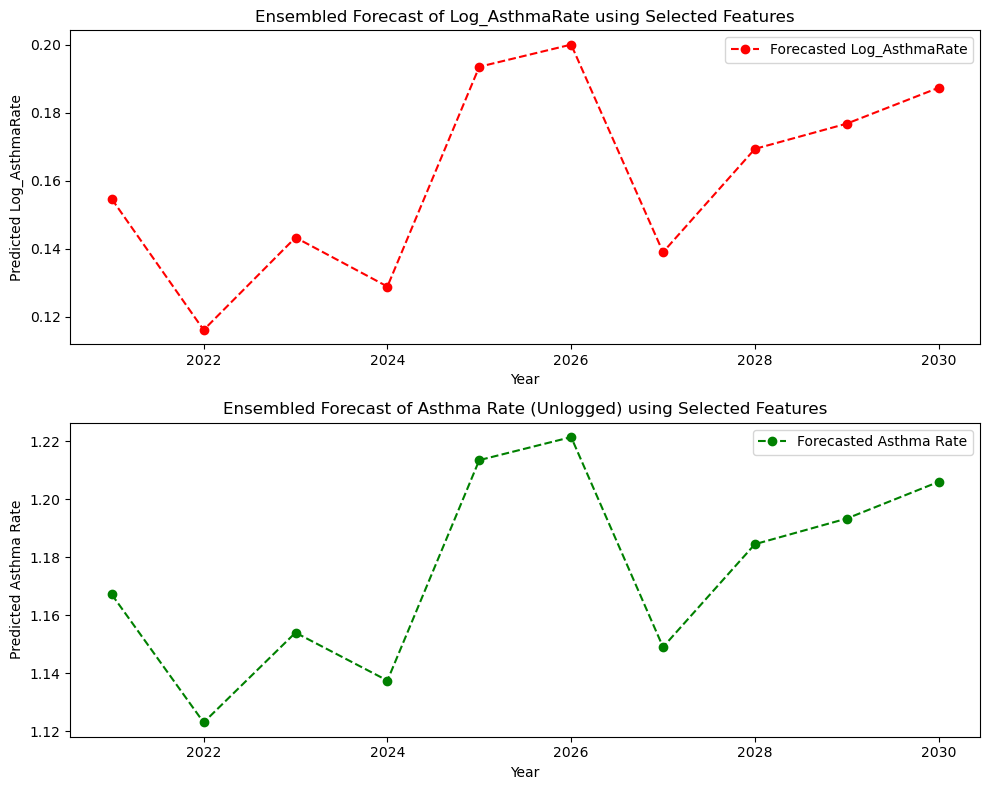

In [93]:
#ensembling technique(stacking)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
# Base learners
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=7, learning_rate=0.1)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)
# Meta learner on top of base learners
stacking_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('gb', gb_model)
    ],
    final_estimator=Ridge(alpha=1.0),
    cv=5
)
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_stack)
mse = mean_squared_error(y_test, y_pred_stack)
r2 = r2_score(y_test, y_pred_stack)

print(f"Ensemble MAE: {mae:.4f}")
print(f"Ensemble MSE: {mse:.5f}")
print(f"Ensemble R² Score: {r2:.4f}")

future_log_forecast = stacking_model.predict(future_data)
future_asthma_rate = np.exp(future_log_forecast)

plt.figure(figsize=(10, 8))

# Log plot
plt.subplot(2, 1, 1)
plt.plot(future_years, future_log_forecast, marker='o', linestyle='dashed', color='red', label='Forecasted Log_AsthmaRate')
plt.xlabel('Year')
plt.ylabel('Predicted Log_AsthmaRate')
plt.title('Ensembled Forecast of Log_AsthmaRate using Selected Features')
plt.legend()

# Unlogged plot
plt.subplot(2, 1, 2)
plt.plot(future_years, future_asthma_rate, marker='o', linestyle='dashed', color='green', label='Forecasted Asthma Rate')
plt.xlabel('Year')
plt.ylabel('Predicted Asthma Rate')
plt.title('Ensembled Forecast of Asthma Rate (Unlogged) using Selected Features')
plt.legend()

plt.tight_layout()
plt.show()


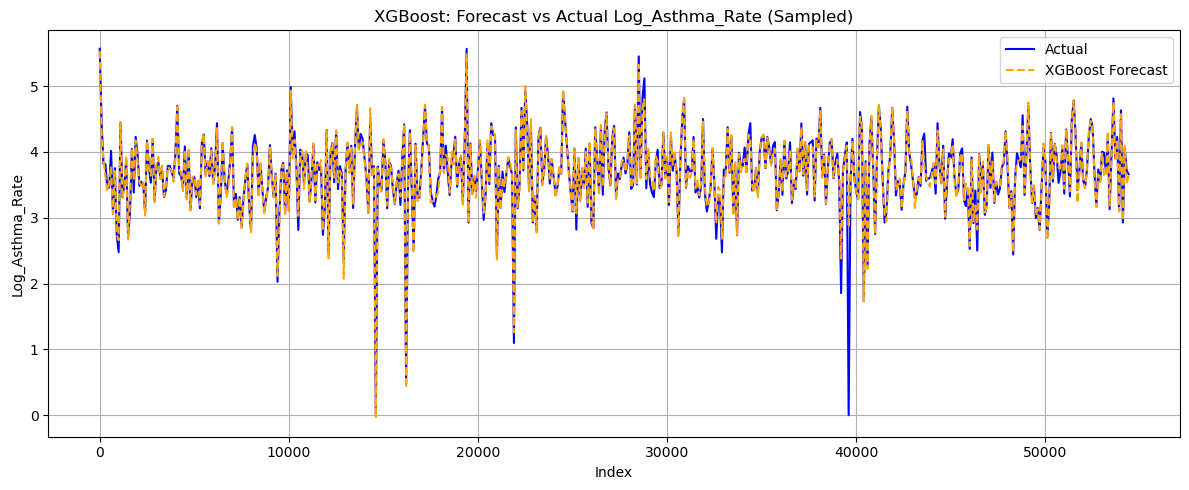

In [164]:
import matplotlib.pyplot as plt
import pandas as pd

# Predict using the already trained XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Reset index for alignment and sampling
y_test_reset = y_test.reset_index(drop=True)
y_pred_series = pd.Series(y_pred_xgb)

# Sample every 100th point for clarity
sample_step = 100
sampled_index = range(0, len(y_test_reset), sample_step)

plt.figure(figsize=(12, 5))
plt.plot(sampled_index, y_test_reset.iloc[sampled_index], label='Actual', color='blue')
plt.plot(sampled_index, y_pred_series.iloc[sampled_index], label='XGBoost Forecast', color='orange', linestyle='--')

plt.title('XGBoost: Forecast vs Actual Log_Asthma_Rate (Sampled)')
plt.xlabel('Index')
plt.ylabel('Log_Asthma_Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [148]:
print(X.isnull().sum().sort_values(ascending=False).head(10))
from sklearn.impute import SimpleImputer

# Fill NaNs in both train and test sets
imputer = SimpleImputer(strategy='median')  # or median, most_frequent
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


Log_PM25               323
Year                     0
Log_Pollution_Index      0
Log_COPD_Rate            0
PM25_AsthmaRate          0
dtype: int64


In [152]:
#bagging,boosting,voting
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    VotingRegressor
)
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Select features & target
features = ['Year', 'Log_Pollution_Index', 'Log_PM25', 'Log_COPD_Rate', 'PM25_AsthmaRate']
target = 'Log_Asthma_Rate'

X = df_selected[features]
y = df_selected[target]

# Split into train/test
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train_df)
X_test = imputer.transform(X_test_df)

# Evaluation helper
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return model


In [153]:
#bagging
bag_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
evaluate_model(bag_model, "Bagging Regressor")


Bagging Regressor
MAE: 0.0037
MSE: 0.0013
R² Score: 0.9967


BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)

In [154]:
# 2. AdaBoost
ada_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, learning_rate=0.1, random_state=42)
evaluate_model(ada_model, "AdaBoost Regressor")


AdaBoost Regressor
MAE: 0.3440
MSE: 0.2095
R² Score: 0.4507


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [155]:
# 3. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
evaluate_model(gb_model, "Gradient Boosting Regressor")


Gradient Boosting Regressor
MAE: 0.2337
MSE: 0.1120
R² Score: 0.7064


GradientBoostingRegressor(max_depth=4, random_state=42)

In [156]:
# 4. Voting Regressor
voting_model = VotingRegressor(
    estimators=[
        ('bagging', bag_model),
        ('adaboost', ada_model),
        ('xgb', XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=4))
    ]
)
evaluate_model(voting_model, "Voting Regressor")


Voting Regressor
MAE: 0.1694
MSE: 0.0516
R² Score: 0.8648


VotingRegressor(estimators=[('bagging',
                             BaggingRegressor(estimator=DecisionTreeRegressor(),
                                              n_estimators=100,
                                              random_state=42)),
                            ('adaboost',
                             AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                                               learning_rate=0.1,
                                               n_estimators=100,
                                               random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_...
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=4,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None, ...))])

In [157]:
def forecast_and_plot(model, model_name, X_train, y_train, future_data, future_years):
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict log values
    log_pred = model.predict(future_data)
    unlogged_pred = np.exp(log_pred)  # Convert to original scale

    # Plot results
    plt.figure(figsize=(10, 8))

    # Log scale
    plt.subplot(2, 1, 1)
    plt.plot(future_years, log_pred, marker='o', linestyle='dashed', color='red', label='Forecasted Log_AsthmaRate')
    plt.xlabel('Year')
    plt.ylabel('Predicted Log_AsthmaRate')
    plt.title(f'{model_name}: Forecast of Log_AsthmaRate')
    plt.legend()

    # Unlogged scale
    plt.subplot(2, 1, 2)
    plt.plot(future_years, unlogged_pred, marker='o', linestyle='dashed', color='green', label='Forecasted Asthma Rate')
    plt.xlabel('Year')
    plt.ylabel('Predicted Asthma Rate')
    plt.title(f'{model_name}: Forecast of Asthma Rate (Unlogged)')
    plt.legend()

    plt.tight_layout()
    plt.show()


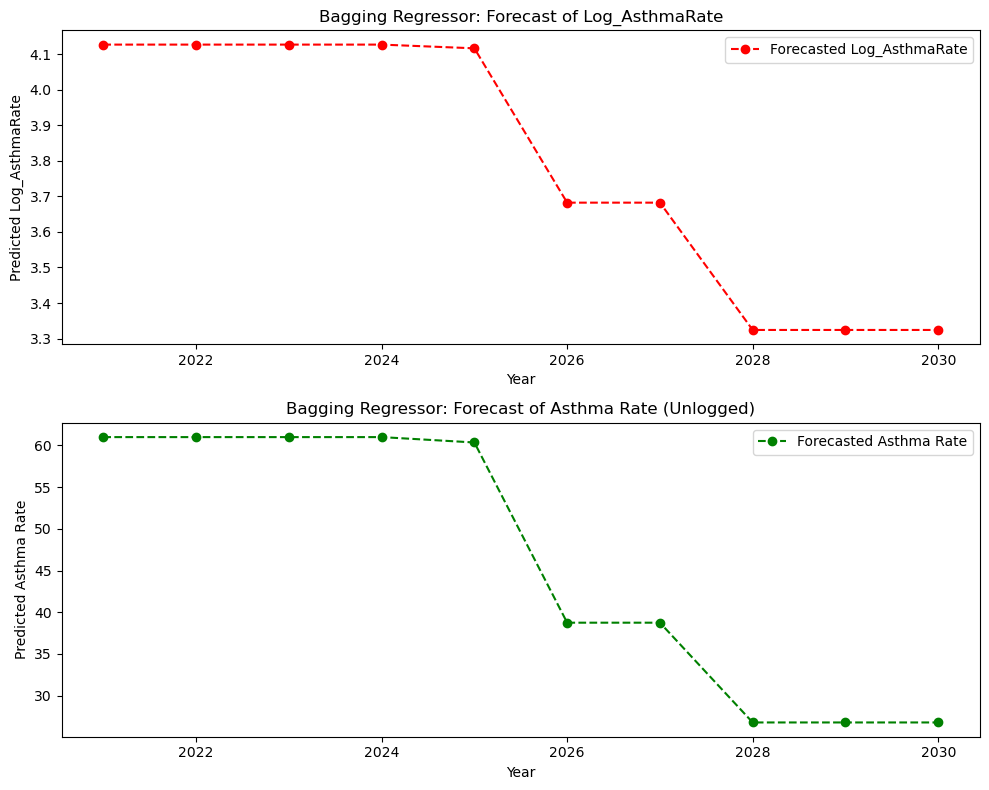

In [159]:

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Re-train Bagging Model if not already ---
bag_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)

# --- Simulate Future Feature Trends ---
future_years = np.arange(2021, 2031)

predicted_pollution = np.linspace(df_selected['Log_Pollution_Index'].mean(), df_selected['Log_Pollution_Index'].mean() + 0.05, len(future_years))
predicted_pm25 = np.linspace(df_selected['Log_PM25'].mean(), df_selected['Log_PM25'].mean() + 0.04, len(future_years))
predicted_copd = np.linspace(df_selected['Log_COPD_Rate'].mean(), df_selected['Log_COPD_Rate'].mean() - 0.02, len(future_years))
predicted_asthma_pm25 = np.linspace(df_selected['PM25_AsthmaRate'].mean(), df_selected['PM25_AsthmaRate'].mean() + 0.03, len(future_years))

# --- Construct Future Feature DataFrame ---
future_data = pd.DataFrame({
    'Year': future_years,
    'Log_Pollution_Index': predicted_pollution,
    'Log_PM25': predicted_pm25,
    'Log_COPD_Rate': predicted_copd,
    'PM25_AsthmaRate': predicted_asthma_pm25
})

# --- Forecast with Bagging Regressor ---
future_log_forecast = bag_model.predict(future_data)
future_asthma_rate = np.expm1(future_log_forecast)  # if you used np.log1p for log transform

# --- Plot Forecasts ---
plt.figure(figsize=(10, 8))

# Log_AsthmaRate
plt.subplot(2, 1, 1)
plt.plot(future_years, future_log_forecast, marker='o', linestyle='dashed', color='red', label='Forecasted Log_AsthmaRate')
plt.xlabel('Year')
plt.ylabel('Predicted Log_AsthmaRate')
plt.title('Bagging Regressor: Forecast of Log_AsthmaRate')
plt.legend()

# Unlogged Asthma Rate
plt.subplot(2, 1, 2)
plt.plot(future_years, future_asthma_rate, marker='o', linestyle='dashed', color='green', label='Forecasted Asthma Rate')
plt.xlabel('Year')
plt.ylabel('Predicted Asthma Rate')
plt.title('Bagging Regressor: Forecast of Asthma Rate (Unlogged)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#hyperparameter tuning for forecasting
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# RandomizedSearchCV for quick optimization
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    scoring='neg_mean_absolute_error',
    n_iter=10,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    verbose=1,
    n_jobs=1
)

# Fit model with best hyperparameters
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Train final model with best params
best_xgb = xgb.XGBRegressor(**random_search.best_params_, objective='reg:squarederror', random_state=42)
best_xgb.fit(X_train, y_train)

# Evaluate new model
y_pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


In [ ]:
sample_size = 2000  # pick a reasonable subset
indices = np.random.choice(len(y_test), sample_size, replace=False)

plt.figure(figsize=(12, 6))
plt.plot(np.array(y_test)[indices], label='Actual', marker='o', linestyle='--', alpha=0.7)
plt.plot(np.array(y_pred)[indices], label='Predicted', marker='s', alpha=0.7)
plt.title('XGBoost Forecasting\n'
          'R² Score: 0.9809 | MAE: 0.0081 | MSE: 0.00015')
plt.xlabel('Sample Index')
plt.ylabel('Asthma Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [161]:

future_data = pd.DataFrame({
    'Year': future_years,
    'Log_Pollution_Index': predicted_pollution,
    'Log_PM25': predicted_pm25,
    'Log_COPD_Rate': predicted_copd,
    'PM25_AsthmaRate': predicted_asthma_pm25
})

# Predicting future Log_Asthma_Rate
future_forecast = model.predict(future_data)

# Plot Forecast
plt.figure(figsize=(8, 5))
plt.plot(future_years, future_forecast, marker='o', linestyle='dashed', color='red', label='Forecasted Log_AsthmaRate')
plt.xlabel('Year')
plt.ylabel('Predicted Log_AsthmaRate')
plt.title('Forecast of Log_AsthmaRate using Selected Features')
plt.legend()
plt.show()


NotImplementedError: 

In [94]:
#"trying arima model "

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [95]:
# Ensure 'Year' is datetime-like and set as index
df_selected['Year'] = pd.to_datetime(df_selected['Year'], format='%Y')
df_selected.set_index('Year', inplace=True)

# Optional: sort if needed
df = df.sort_index()

# Target variable
target = df_selected['Log_Asthma_Rate']


In [96]:
train_size = int(len(target) * 0.8)
train, test = target[:train_size], target[train_size:]


In [97]:
# Fit ARIMA
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))


C:\Users\koush\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\koush\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\koush\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\koush\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zer

In [98]:
# Evaluate
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
r2 = r2_score(test, forecast)

print("ARIMA Results:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


ARIMA Results:
MAE: 0.2530412817922523
MSE: 0.06722496013627328
R² Score: -20.040216143354222


In [99]:
#SARIMAX

📊 SARIMAX Evaluation:
MAE: 0.25592
MSE: 0.06840
R² Score: -20.40660


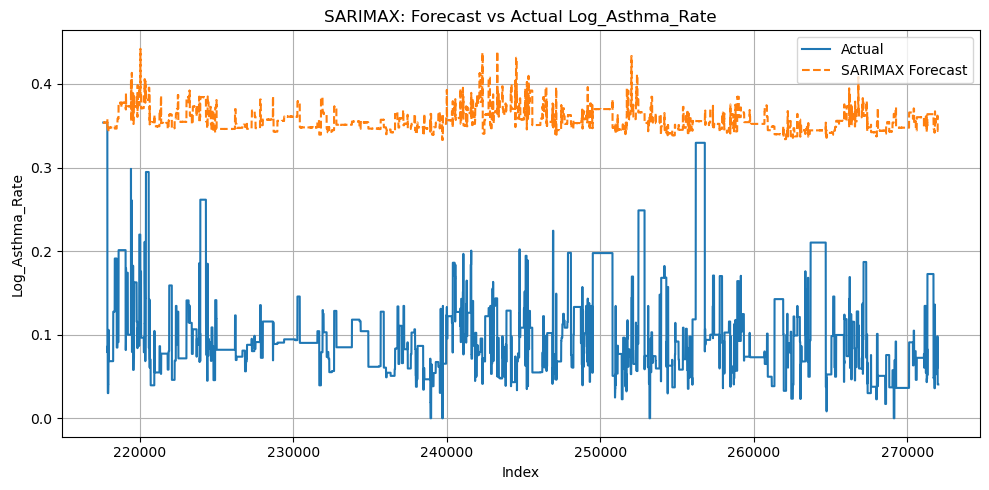

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define features and target
features = ['Year','Log_PM25', 'Log_COPD_Rate']
target = 'Log_Asthma_Rate'

# Extract X and y
X = df_selected[features]
y = df_selected[target]

# Train-test split (no shuffling for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Remove 'Year' from exogenous features (we keep it in X for modeling, but it's not helpful as an exog)
X_train_exog = X_train.drop(columns=['Year'])
X_test_exog = X_test.drop(columns=['Year'])

# Fit SARIMAX
model = SARIMAX(y_train, exog=X_train_exog, order=(1, 1, 1), seasonal_order=(1, 0, 1, 2),
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# Forecast
y_pred = results.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test_exog)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 SARIMAX Evaluation:\nMAE: {mae:.5f}\nMSE: {mse:.5f}\nR² Score: {r2:.5f}")

# Plotting
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='SARIMAX Forecast', linestyle='--')
plt.title('SARIMAX: Forecast vs Actual Log_Asthma_Rate')
plt.xlabel('Index')
plt.ylabel('Log_Asthma_Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

for col in ['Log_PM25', 'Log_COPD_Rate', 'Log_Pollution_Index']:
    result = adfuller(df_selected[col])
    print(f"{col} — p-value: {result[1]}")
